<a href="https://colab.research.google.com/github/Yangl1492/Fraud-Detection/blob/main/Final_Project_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title
Real-time Anomaly Detection in Financial Transactions

## Authors and Team

Author 1: Haozhen Guo

Author 2: Yang Liu

Team name: Black Thym

# Executive Summary

For this project, Real-Time Anomaly Detection in Financial Transactions, the major objective is
to develop and optimize machine learning algorithms for anomaly detection, focusing on fraud
detection in the financial market. By improving the performance of the anomaly detection method,
we are trying to reduce financial losses for individuals, achieve better jobs in risk management, and
enhance anti-money laundering systems.

## Motivation

According to the Statista Report (December 2023) \ref{statista2023}, global losses due to card fraud in 2023 amounted to \$33.45 billion. Although the year-over-year percentage increase has decelerated from 13.8\% to 3.4\%, the overall increase in the total loss underlines the significant situation of personal financial loss. In detail, the Consumer Sentinel Network Data Book (2023) from the Federal Trade Commission reported over \$10 billion in losses across 2.5 million fraud reports in the United States \ref{ftc2023}. Considering the relatively low rates of reported fraud among individuals under 19 and over 80, the actual value of losses is likely much higher. All of the above news emphasized one significant problem: The public is at increasingly terrible risk of fraud.

While it is essential to improve public awareness of the common types of fraud in daily life, there is a growing need for advanced anomaly detection in financial transactions. Due to the massive daily transactions, traditional analytical methods are facing significant challenges regarding technology innovation and data privacy policy. As Fathe Jeribi (2024) states, Machine Learning (ML) has emerged as a pioneer tool for fraud detection, as it learns and then extracts the hidden information from data without explicit instructions from human beings, which will support the decision-making process in the future \ref{jeribi2024}. Recently, with the development of big data technologies, researchers have made more effort to combine them with existing methods of anomaly detection.  In their study on clustering-based real-time anomaly detection, Habeeb et al. (2022), summarize a range of algorithms focusing on anomaly detection, including clustering, Naïve Bayes, SVM, K-means, and other big data-driven approaches \ref{habeeb2022}.

In our study, we aim to explore anomaly detection within financial marketing with different methods and seek to optimize algorithms through research and experiments.

## Decisions to be impacted
Based on our research, anomaly detection algorithms play a crucial role in shaping business decisions across three key areas:

- **Personal Savings Protection**: By identifying abnormal transactions, banks and other financial institutions can proactively monitor and block suspicious or high-risk activities, thereby safeguarding individual savings and account security.

- **Risk Management**: Anomaly detection enables financial institutions to recognize unusual patterns within portfolio management, allowing for timely adjustments to investment strategies, and ultimately enhancing risk management and financial performance.

- **Anti-Money Laundering (AML)**: A major application of anomaly detection is in identifying irregular transaction behaviors that may indicate potential money laundering activities, helping institutions comply with regulations and prevent financial crime.

## Business Value

Our research holds societal relevance in two primary areas:

- **Protection of Vulnerable Populations**: Across all of the people who suffer from financial fraud, vulnerable groups such as the elderly, low-income families, and individuals withliabilities are most likely to become the target of fraud, while at the same time, they do nothave enough ability to contend with it. Once the anomalies related to financial fraud becomeundetected, these populations are exposed to considerable financial risks. By developing ad-
vanced and effective detection methods, we wish to contribute more to preventing vulnerableindividuals from fraud and the risk of loss of personal property.

- **Enhancing Trust in the Digital Age**: As financial systems become more digitized, publicattitudes toward automated systems are becoming increasingly polarized and extreme. Somepeople fully trust algorithms without a comprehensive understanding of them, while othersbelieve nothing but rely solely on personal judgment. As both views are taken to extremes,the development of the financial market will face significant challenges. By establishing arobust anomaly detection system, we want to help restore and strengthen public trust in financial institutions.

## Data Assets
Our fraud detection dataset was collected from Kaggle and provided from Vesta Corporation, a leader in e-commerce payment solutions. The dataset was split into two files: “train_identity.csv” and “train_transaction.csv”, both of which can be joined through the common and unique key TransactionID. Our goal is to establish machine learning methods to identify fraudulent transactions, which was labeled as isFraud in  “train_transaction.csv”, using a wide range of features. Here are some detailed information about each dataset:

**“train_transaction.csv”**: Contains the majority of data related to transactions.

- TransactionDT: timedelta from a given reference datetime (not an actual timestamp)

- TransactionAMT: transaction payment amount in USD

- ProductCD: product code, the product for each transaction

- card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

- addr: address

- dist: distance

- P_ and (R__) emaildomain: purchaser and recipient email domain

- C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

- D1-D15: timedelta, such as days between previous transaction, etc.

- M1-M9: match, such as names on card and address, etc.

- Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

**“train_identity.csv”**: Contains the identity information variables associated with transactions, such as network connection information (IP, ISP, etc) and digital signature (UA/os, etc). However, the field names were masked and pairwise dictionaries would not be provided for privacy protection and contract agreement.

For this project, we will benchmark machine learning models on a large-scale dataset about real-world e-commerce financial transactions. We wish to build up a better method to detect the fraud in transactions, and further achieve saving personal assets  with higher accuracy and efficiency.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
!pip install category_encoders
from category_encoders.cat_boost import CatBoostEncoder
!pip install catboost
from catboost import CatBoostClassifier, Pool

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.linear_model import SGDClassifier
import lightgbm as lgb
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
import random
import joblib
import tensorflow as tf
from tensorflow import keras
import logging
import itertools
from sklearn.metrics import roc_curve
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")
import altair as alt
from IPython.display import display

Mounted at /content/gdrive


# Raw Data Preview

The original data consists of two datasets, **"train_transaction.csv"** and **"train_identity.csv"**. Both datasets record transaction-related features with the same "TransactionID." Our starting point is to determine the most effective way to join these two datasets while considering the relevance of their features.



In [ ]:
df_transaction= pd.read_csv('train_transaction.csv')
df_identity = pd.read_csv('train_identity.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train_transaction.csv'

In [ ]:
df_transaction.head()

In [ ]:
df_identity.head()

As shown above, the **"train_transaction.csv"** dataset contains significantly more features than **"train_identity.csv"**.  Additionally, it includes the target feature, **"isFraud"**, which indicates whether a transaction is fraudulent. Both datasets contain approximately 590,000 transaction records, providing a substantial amount of data for developing machine learning models. Given this, we test both left and inner joins to combine the datasets.

## Left Join vs Inner Join

In [ ]:
df_left = pd.merge(df_transaction, df_identity, on='TransactionID', how = 'left')
print(df_left.shape)
df_left.head()

In [ ]:
df_inner = pd.merge(df_transaction, df_identity, on='TransactionID', how = 'inner')
print(df_inner.shape)
df_inner.head()

In [ ]:
#df_left.to_csv('train_all_left.csv')
#df_inner.to_csv('train_all_inner.csv')

In [ ]:
df_left=pd.read_csv('train_all_left.csv').iloc[:,1:]
df_inner=pd.read_csv('train_all_inner.csv').iloc[:,1:]

In [ ]:
df_left['isFraud'].value_counts(dropna=False, normalize = True)

In [ ]:
df_inner['isFraud'].value_counts(dropna=False, normalize = True)

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
for i in range(2):
    if i == 0:
        df_draw = df_left
    elif i == 1:
        df_draw = df_inner

    l_df_null = {}
    for val in df_draw.isnull().mean():
        l_df_null[round(val//0.05 * 0.05,2)] = l_df_null.get(round(val//0.05 * 0.05,2),0) + 1

    l_keys, l_values = [],[]
    for k,v in l_df_null.items():
        l_keys.append(k)
        l_values.append(round(v/434,2))

    axs[i].bar(l_keys, l_values, width=0.05, color='b', edgecolor='black')
    axs[i].set_xlabel('Nan %')
    axs[i].set_ylabel('Count %')
    axs[i].set_title('Histogram of NaN % vs Count % for '+['Left Join','Inner Join'][i])
    axs[i].grid(True)
    axs[i].set_xticks([i/10 for i in range(11)])

plt.tight_layout()
plt.show()

According to our analysis, the left join retains more transaction records but results in nearly half of the features having over 70% NaN values. In contrast, the inner join reduces NaN values significantly, with almost 60% of the features having less than 10% NaN values, making the dataset more practical for further analysis. Therefore, we will proceed with the inner join dataset for this project.

## Inner Join Dataset Summary

In [ ]:
def create_summary_table(df):
    summary = pd.DataFrame(index = df.columns)
    summary['Data Type'] = df.dtypes.values
    summary['# Nonnull records'] = df.count().values
    summary['# Non-zero records'] = df.astype(bool).sum(axis=0)
    summary['% null records'] = round(df.isna().sum()/df.shape[0]*100,2)
    summary['% non-zero records'] = round(df.astype(bool).sum(axis=0) / df.shape[0]*100,2)
    summary['Unique values'] = df.nunique().values
    #summary.to_csv('summary_table.csv')
    return summary

In [ ]:
summary = create_summary_table(df_inner)
summary

In [ ]:
#summary.to_csv('summary_table.csv')

# Data Preprocessing

## Data Cleaning

### Correlation Check for Target Column
Before dropping columns with a high percentage of NaN or dominated values, we first calculate the correlation between each column and the **target column (“isFraud”)**. This helps us identify features that may strongly correlate with the target when a transaction is fraudulent. After performing the calculations, the highest absolute correlation value is **0.396**, indicating that no feature has a strong correlation with the target column.

In [ ]:
df_inner = pd.read_csv('train_all_inner.csv', index_col = 0)

In [ ]:
numerical_col = df_inner.columns[df_inner.dtypes != 'object']

In [ ]:
corr_map = {}
for col in list(numerical_col)[3:]:
    temp_df = df_inner[['isFraud',col]].dropna(how='any')
    if temp_df.shape[0] > 1:
        if temp_df[col].nunique() > 1:
            corr = temp_df['isFraud'].corr(temp_df[col])
            corr_map[col] = corr

top_5_abs_values = sorted(corr_map.items(), key=lambda item: abs(item[1]), reverse=True)[:5]
print("Top 5 absolute correlation values and their keys:")
for key, value in top_5_abs_values:
    print(f"Key: {key}, Value: {value}")

Top 5 absolute correlation values and their keys:
Key: V87, Value: 0.39601617889413654
Key: V45, Value: 0.39312089427041336
Key: V86, Value: 0.3878639694956669
Key: V257, Value: 0.3832856148820498
Key: V246, Value: 0.3671387615176601


### Drop NA and Dominant-value Feature
We use two methods to analyze the distribution of NaN values in our dataset. First, we create a table that records each feature's data type, percentage of null values, and the number of unique values, which helps us evaluate the characteristics of each feature. Next, we calculate the proportion of NaN values to determine an appropriate threshold for handling missing data. The following table shows the proportion of NaN values:

In [ ]:
l_df_null = {}
for i in df_inner.isnull().mean():
    Nan_Percentage = i//0.05 * 0.05
    l_df_null[str(round(Nan_Percentage,2))+"-"+ str(round(Nan_Percentage+0.05,2))] = l_df_null.get(str(round(Nan_Percentage,2))+"-"+ str(round(Nan_Percentage+0.05,2)),0) + 1

pd.DataFrame(list(l_df_null.items()), columns=['Nan %', 'Count']).sort_values(by='Nan %')

Nan %  Count
0   0.0-0.05    194
4   0.05-0.1     50
9   0.1-0.15      2
11  0.15-0.2      1
1   0.4-0.45     50
8   0.45-0.5      8
7   0.5-0.55     70
6   0.55-0.6     23
10  0.65-0.7      1
3   0.7-0.75      2
5   0.75-0.8      3
2   0.95-1.0     30

 From the table, it is evident that when the NaN percentage is in the range **[0, 0.2]**, we retain half of the features, which is sufficient for model training. Additionally, there are no features with NaN percentages between 0.2 and 0.40. A 20% threshold for NaN values is significantly more manageable compared to 40%, making it a preferable choice for data retention.

If a feature contains a high percentage of identical values, it contributes little useful information and may introduce noise into the model. Therefore, we decided to drop features with a high proportion of dominated values to reduce noise and maintain the quality of the dataset.


In [ ]:
def threshold(t_null, t_dominant, df):
    many_null_col = list(set([col for col in df.columns if df[col].isnull().mean() > t_null]))

    dominant_value_col =list(set([col for col in df.columns if df[col].value_counts(dropna=False, normalize=True).values[0] > t_dominant]))
    cols_to_drop = list(set(many_null_col+dominant_value_col))
    return cols_to_drop

In [ ]:
cols_to_drop=threshold(0.2, 0.8, df_inner)
cols_to_drop.remove('isFraud')
df_drop = df_inner.drop(columns=cols_to_drop)

print(df_drop.shape)
df_drop.head()

(144233, 83)


TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987004        0          86506          50.000         H   4497   
1        2987008        0          86535          15.000         H   2803   
2        2987010        0          86549          75.887         C  16496   
3        2987011        0          86555          16.495         C   4461   
4        2987016        0          86620          30.000         H   1790   

   card2  card3       card4  card5  ...  id_19  id_20  id_28     id_29  \
0  514.0  150.0  mastercard  102.0  ...  542.0  144.0    New  NotFound   
1  100.0  150.0        visa  226.0  ...  621.0  500.0    New  NotFound   
2  352.0  117.0  mastercard  134.0  ...  410.0  142.0  Found     Found   
3  375.0  185.0  mastercard  224.0  ...  176.0  507.0    New  NotFound   
4  555.0  150.0        visa  226.0  ...  529.0  575.0  Found     Found   

                 id_31  id_35  id_37  id_38  DeviceType  \
0  samsung browser 6.2      T      T      T      mobile   
1   mobile safari 11.0      T      F      T      mobile   
2          chrome 62.0      F      T      T     desktop   
3          chrome 62.0      F      T      T     desktop   
4          chrome 62.0      T      T      T     desktop   

                      DeviceInfo  
0  SAMSUNG SM-G892A Build/NRD90M  
1                     iOS Device  
2                        Windows  
3                            NaN  
4                          MacOS  

[5 rows x 83 columns]

In [ ]:
#df_drop.to_csv('df_drop.csv')

In [ ]:
#df_drop = pd.read_csv('df_drop.csv').iloc[:,1:]

In [ ]:
df_drop['isFraud'].value_counts(dropna=False, normalize = True)

isFraud
0    0.92153
1    0.07847
Name: proportion, dtype: float64

### Fill NAN

#### Correlation heatmap of Features with entire values

Since our approach to filling missing values relies on model training using features with available data, we first use a heat map to visualize the correlations among these features. This helps us identify relationships between them and allows us to reduce the dimensionality of the dataset before imputing the missing values.


In [ ]:
full_data_col = df_drop.loc[:, df_drop.isnull().sum() == 0].columns.values
categorical_col = df_drop.columns[df_drop.dtypes == 'object']
numerical_col = df_drop.columns[df_drop.dtypes != 'object']
categorical_col_NAN = [col for col in categorical_col if col not in full_data_col]
numerical_col_NAN = [col for col in numerical_col if col not in full_data_col]
num_full_col = [col for col in numerical_col if col in full_data_col]
categorical_full_col = [col for col in categorical_col if col in full_data_col]

In [ ]:
numerical_col_FULL = num_full_col

In [ ]:
print(numerical_col_FULL)

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'C1', 'C2', 'C4', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'id_01']


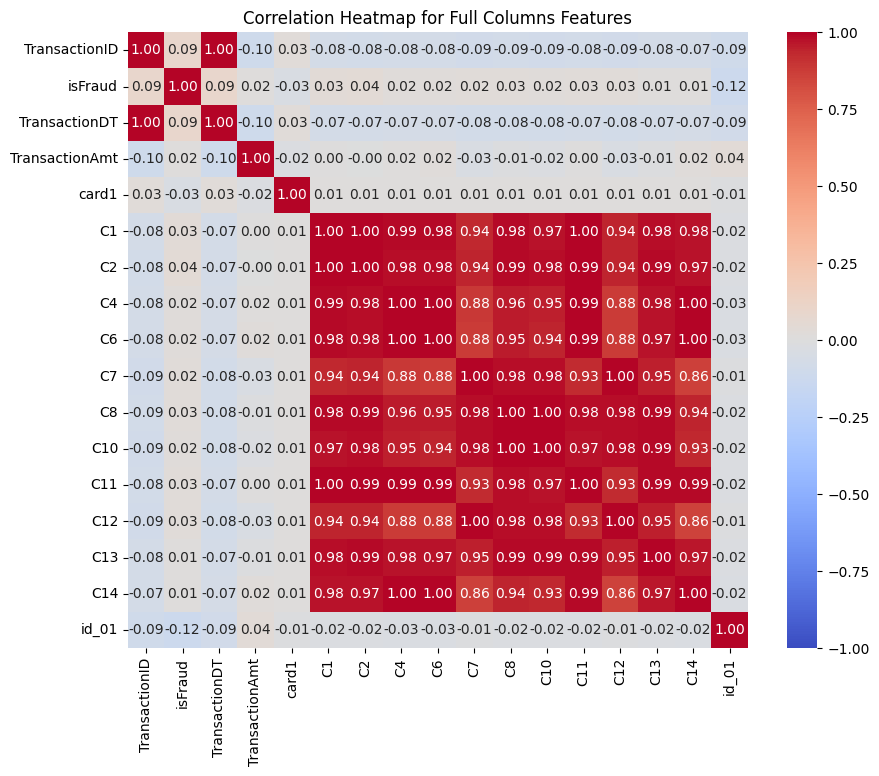

In [ ]:
corr_matrix = df_drop[numerical_col_FULL].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Full Columns Features')
plt.show()

In [ ]:
PCA_list = ['C1', 'C2', 'C4', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14']
C_X = df_drop.loc[:,PCA_list]
scaler = StandardScaler()
pca = PCA(n_components=1)
pca.fit(scaler.fit_transform(C_X))
C_PCA = pca.transform(C_X)

According to the heatmap, features from C1 to C14 are highly correlated. When multiple features are highly correlated, they may contain redundant information. By using PCA, we create one component which captures the core information from all the original features.


In [ ]:
df_drop = df_drop.copy().drop(columns = PCA_list)
df_drop['C_PCA'] = C_PCA

In [ ]:
full_data_col = df_drop.loc[:, df_drop.isnull().sum() == 0].columns.values
categorical_col = df_drop.columns[df_drop.dtypes == 'object']
numerical_col = df_drop.columns[df_drop.dtypes != 'object']

categorical_col_NAN = [col for col in categorical_col if col not in full_data_col]
numerical_col_NAN = [col for col in numerical_col if col not in full_data_col]
numerical_col_FULL = [col for col in numerical_col if col in full_data_col]

In [ ]:
non_nan_num_col = ['TransactionAmt','card1','C_PCA','id_01']
corr_check ={}
for nan_col in numerical_col_NAN:
    corr_check[nan_col]={}
    for full_col in non_nan_num_col:
        correlation = df_drop[nan_col].corr(df_drop[full_col])
        corr_check[nan_col][full_col] = correlation
avg_corr, max_feature, max_corr = [],[],[]
for i in corr_check.values():
    each_corr_value = list(i.values())
    each_corr_feature = list(i.keys())
    avg_corr.append(sum(each_corr_value)/len(each_corr_value))
    abs_corr = list(map(lambda x: abs(x), each_corr_value))
    max_abs_index = abs_corr.index(max(abs_corr))
    max_feature.append(each_corr_feature[max_abs_index])
    max_corr.append(each_corr_value[max_abs_index])

In [ ]:
df_corr_check = pd.DataFrame(list(zip(*[numerical_col_NAN, avg_corr, max_feature, max_corr])),
                             columns=['Nan_Feature', 'Avg_Corr', 'Max_NotNull_Feature', 'Max_Corr_Abs']).sort_values(by='Max_Corr_Abs')
df_corr_check = df_corr_check.reindex(df_corr_check['Max_Corr_Abs'].abs().sort_values(ascending=False).index)
df_corr_check.head()

Nan_Feature  Avg_Corr Max_NotNull_Feature  Max_Corr_Abs
48       id_17 -0.107725      TransactionAmt     -0.334971
1        card3 -0.070558      TransactionAmt     -0.256826
46       id_06  0.055087               id_01      0.201637
2        card5 -0.042709               card1     -0.199373
32        V263  0.045441      TransactionAmt      0.156411

#### Categorical Feature Visualization
Before filling the NaN value of categorical features, the visualization of categorical features is necessary for us to decide use which way to fill them.

In [ ]:
print(categorical_col_NAN)

['card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'id_15', 'id_16', 'id_28', 'id_29', 'id_31', 'id_35', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


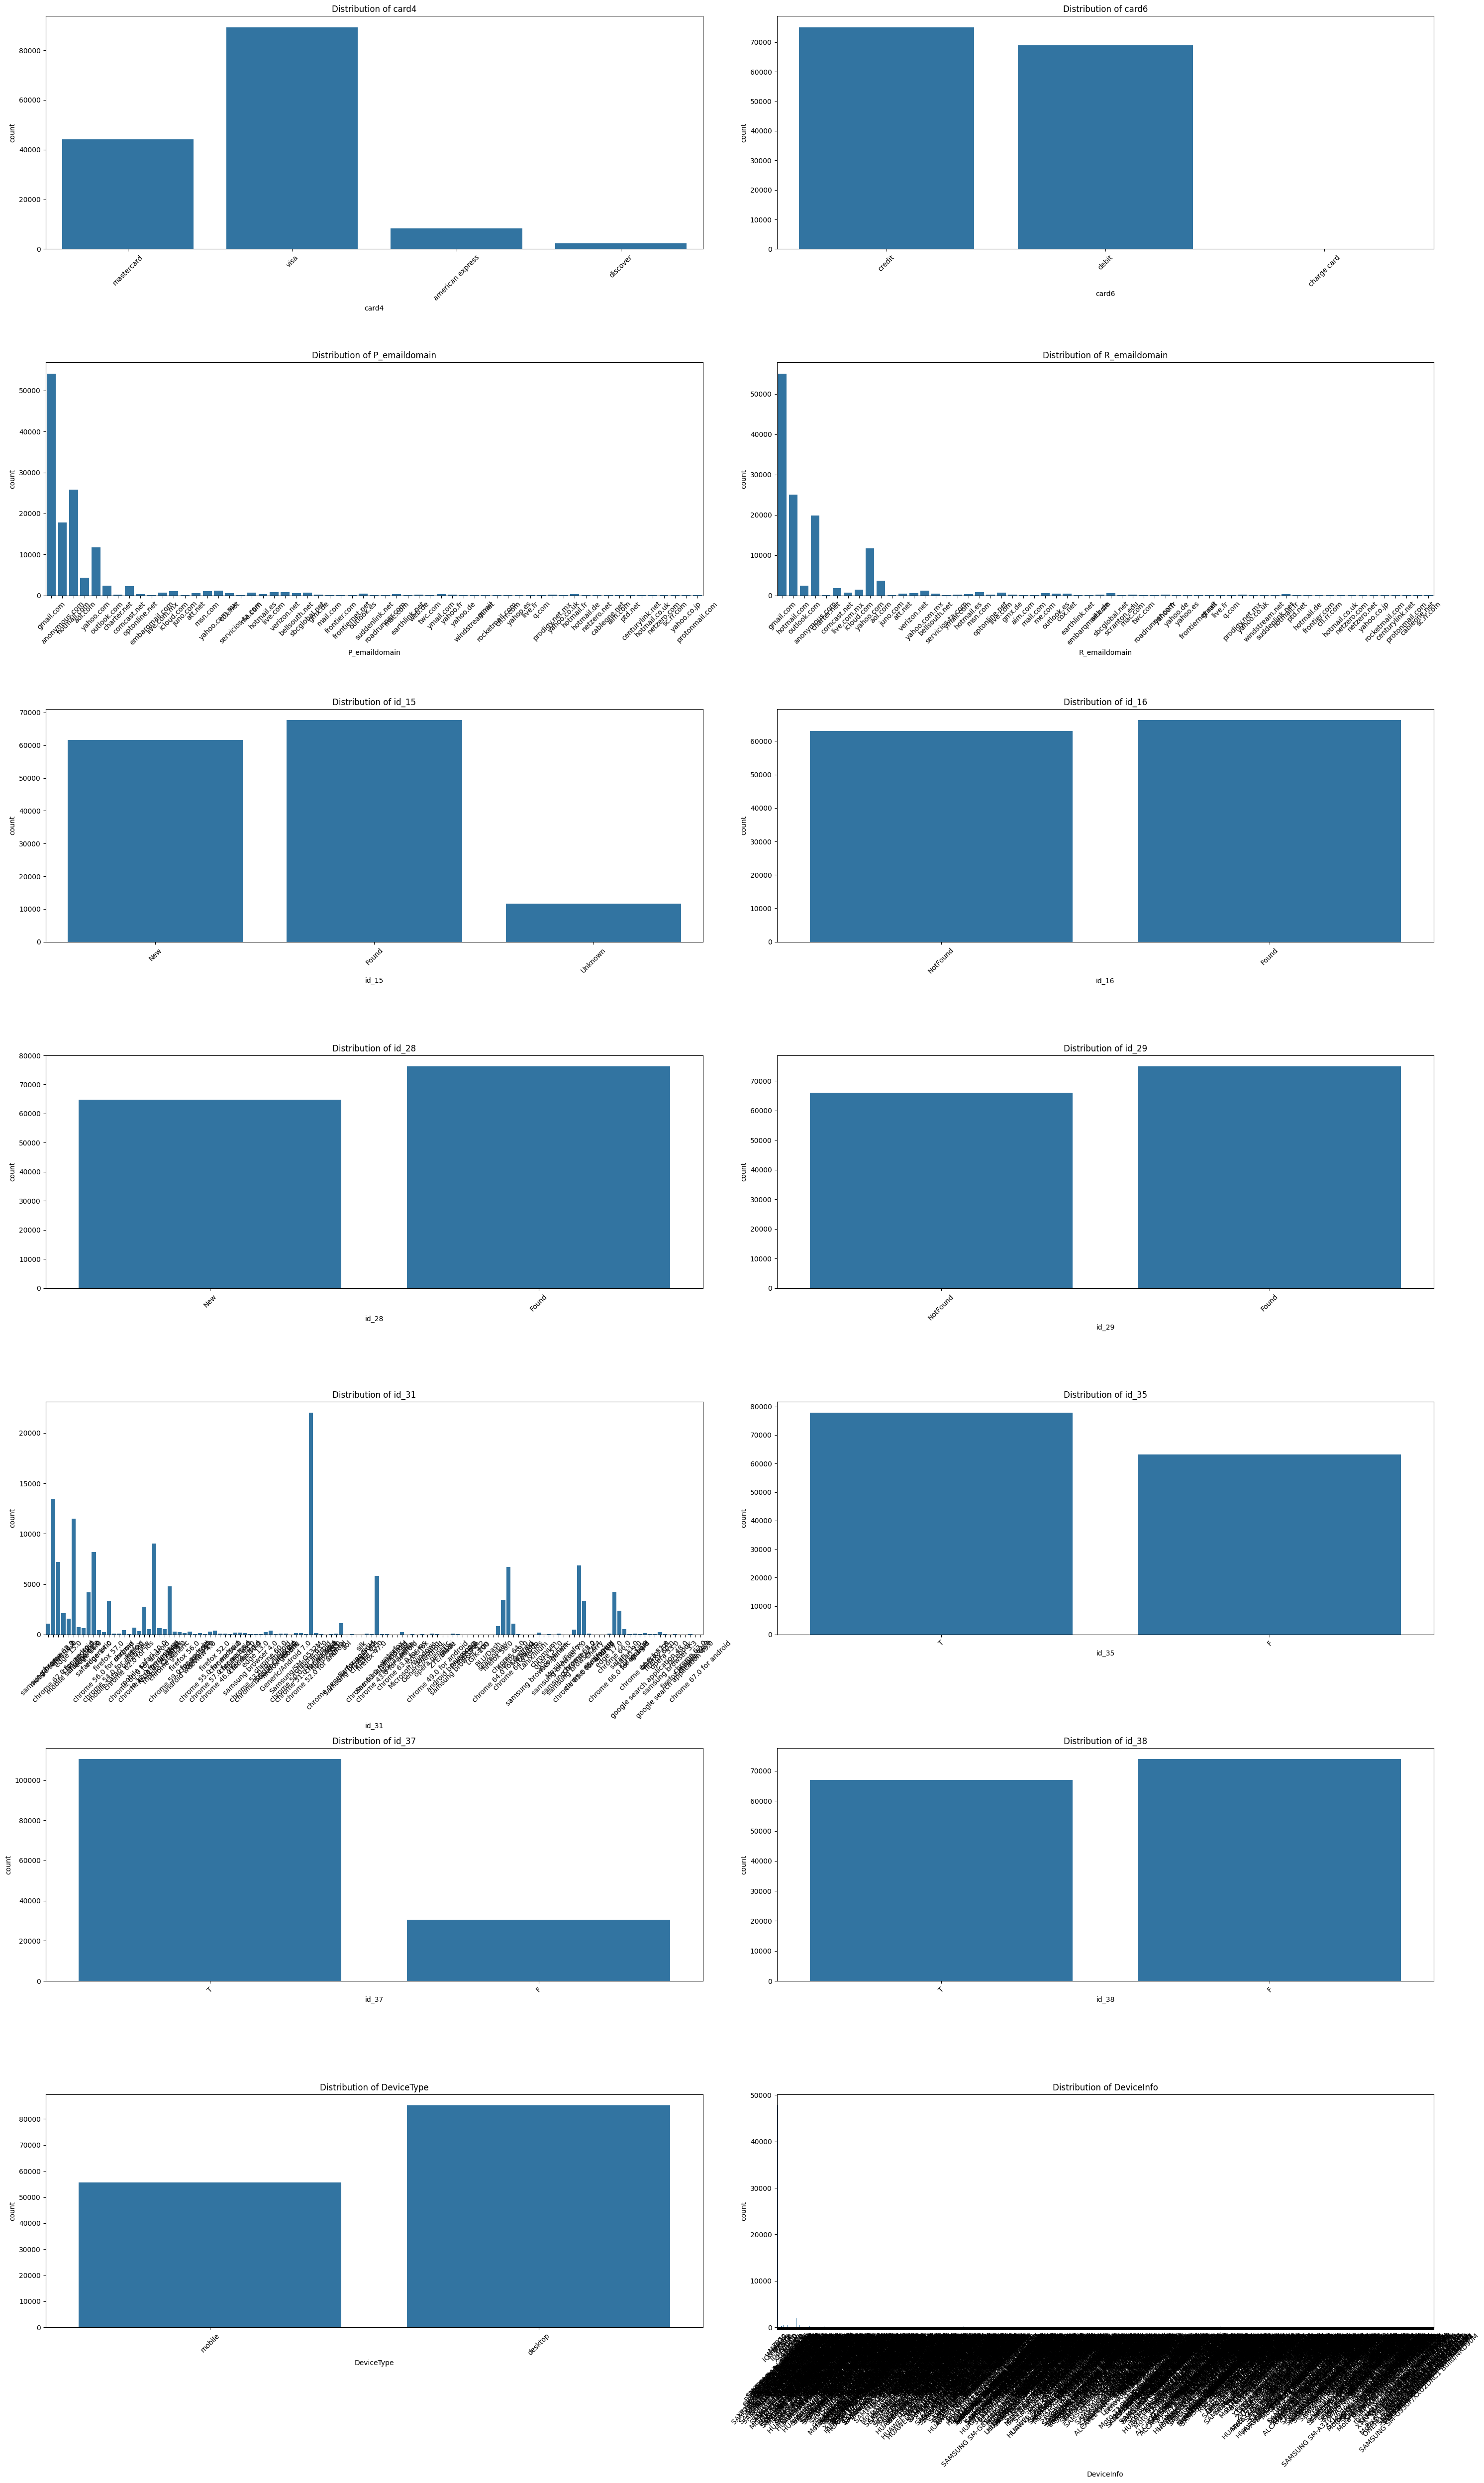

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(30, 50))
axes = axes.flatten()

# Plot the distribution of each categorical feature
for i, col in enumerate(categorical_col_NAN):
    sns.countplot(data=df_drop, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

We used bar charts to visualize the distributions of various features, revealing four types of patterns.


*   The first type is characterized by clear classification with a small number of unique values (less than 5), such as card4 and card6.
*   The second type displays a highly uneven distribution, where a few categories dominate most of the data, and the frequency of other categories drops sharply, exhibiting a typical long-tail effect; P_emaildomain is an example of this pattern.
*   The third type is a sparse distribution, where there are many unique values, but each value appears infrequently, resulting in a very low frequency for most categories such as DeviceInfo. It contributes limited information to the model.
*   Additionally, we observed a combination of the second and third distribution types in certain features, such as id_31, which represents browser type and version. While a few values account for a significant portion of the data, the remaining values are distributed sparsely. Subtle differences in browser versions are not critical to the model's predictive power, and an overly granular division could introduce noise into the model.

So we need to drop the feature “DeviceInfo”, extract key information as new eigenvalues for the id_31.


#### Drop Feature (DeviceInfo)

In [ ]:
df_NAFill_Cat = df_drop.copy()
df_NAFill_Cat=df_NAFill_Cat.drop(['DeviceInfo'], axis=1)
categorical_col_NAN.remove('DeviceInfo')


#### Simple Filling
In the feature ‘id_15’, it already has a value ‘Unknown’, so we just use the ‘Unknown’ to simply fill the NaN value.

In [ ]:
print(list(df_NAFill_Cat['id_15'].unique()))
df_NAFill_Cat['id_15'] = df_NAFill_Cat['id_15'].fillna('Unknown')

['New', 'Found', nan, 'Unknown']


#### KNN filling

##### Preprocessing (categorical) -> KNN filling
The feature id_31 captures the type of browser used, but it includes various versions of each browser. Including version information would create an excessive number of categories, resulting in sparse and fragmented data. To address this, we chose to disregard the version details and focus only on the browser type. This approach retains the essential information about the browser while reducing the number of categories, making the data more concentrated and easier to analyze. Upon examination, we identified the primary browser types in this feature, including 'chrome,' 'safari,' 'firefox,' 'edge,' and others.


In [ ]:
unique_browser_info = df_NAFill_Cat['id_31'].unique()
unique_browser_info

array(['samsung browser 6.2', 'mobile safari 11.0', 'chrome 62.0', nan,
       'chrome 62.0 for android', 'edge 15.0', 'mobile safari generic',
       'chrome 49.0', 'chrome 61.0', 'edge 16.0', 'safari generic',
       'edge 14.0', 'chrome 56.0 for android', 'firefox 57.0',
       'chrome 54.0 for android', 'mobile safari uiwebview', 'chrome',
       'chrome 62.0 for ios', 'firefox', 'chrome 60.0 for android',
       'mobile safari 10.0', 'chrome 61.0 for android',
       'ie 11.0 for desktop', 'ie 11.0 for tablet', 'mobile safari 9.0',
       'chrome generic', 'other', 'chrome 59.0 for android',
       'firefox 56.0', 'android webview 4.0', 'chrome 55.0', 'opera 49.0',
       'ie', 'chrome 55.0 for android', 'firefox 52.0',
       'chrome 57.0 for android', 'chrome 56.0',
       'chrome 46.0 for android', 'chrome 58.0', 'firefox 48.0',
       'chrome 59.0', 'samsung browser 4.0', 'edge 13.0',
       'chrome 53.0 for android', 'chrome 58.0 for android',
       'chrome 60.0', 'mobile sa

In [ ]:
browser_type = [
    'chrome','safari','firefox','edge','other', 'samsung','opera','silk','waterfox',
    'Nokia','puffin','Microsoft','cyberfox','ZTE','palemoon','maxthon','line','LG',
    'konqueror','iceweasel','iron','BLU','seamonkey','M4','comodo','Lanix','Inco',
    'Cherry','icedragon','BLU','android']

In [ ]:
transfer_map = {}
for browser in unique_browser_info:
    browser_lower = str(browser).lower()
    for keyword in browser_type:
        keyword_lower = keyword.lower()
        if keyword_lower in browser_lower:
            transfer_map[browser] = keyword
            break
        elif 'google' in browser_lower or 'chromium' in browser_lower:
            transfer_map[browser] = 'chrome'
        elif 'ie' in browser_lower:
            transfer_map[browser] = 'edge'
        else:
            transfer_map[browser] = browser
df_NAFill_Cat['id_31'] = df_NAFill_Cat['id_31'].map(transfer_map)
df_drop['id_31'] = df_drop['id_31'].map(transfer_map)

##### Grouping Infrequent Values
For the processed features id_31, P_emaildomain, and R_emaildomain, we first calculated the proportion of unique values within each feature. The results indicated that most values had relatively low frequencies, each comprising less than 1% of the total. Therefore, we grouped these infrequent values into a single category labeled "others." This approach simplifies the feature categories, reduces noise, and enhances the model's generalization ability.

In [ ]:
browser_type_counts = df_drop['id_31'].value_counts(normalize=True)*100
browser_counts = {}
for i in browser_type_counts.values:
    browser_counts[i//1] = browser_counts.get(i//1,0) + 1
l_keys, l_values = [],[]
for k,v in browser_counts.items():
    l_keys.append(k)
    l_values.append(v)
pd.DataFrame({'browser_type %':l_keys, 'Count':l_values}).sort_values(by='browser_type %',ascending=False)

browser_type %  Count
0            54.0      1
1            26.0      1
2            11.0      1
3             5.0      1
4             1.0      1
5             0.0     26

In [ ]:
threshold = 1
browser_type_others = browser_type_counts[browser_type_counts < threshold].index.tolist()
df_NAFill_Cat['id_31'] = df_drop['id_31'].apply(lambda x: 'others' if x in browser_type_others else x)

df_NAFill_Cat['id_31'].value_counts(normalize=True)*100

id_31
chrome     54.323434
safari     26.575755
edge       11.501119
firefox     5.002067
samsung     1.601774
others      0.995851
Name: proportion, dtype: float64

In [ ]:
df_NAFill_Cat['P_emaildomain'].unique()

array(['gmail.com', 'anonymous.com', 'hotmail.com', 'aol.com',
       'yahoo.com', nan, 'outlook.com', 'charter.net', 'comcast.net',
       'optonline.net', 'embarqmail.com', 'live.com.mx', 'icloud.com',
       'juno.com', 'att.net', 'msn.com', 'yahoo.com.mx', 'cox.net',
       'servicios-ta.com', 'me.com', 'hotmail.es', 'live.com',
       'verizon.net', 'bellsouth.net', 'sbcglobal.net', 'gmx.de',
       'mail.com', 'frontier.com', 'frontiernet.net', 'outlook.es',
       'suddenlink.net', 'roadrunner.com', 'mac.com', 'earthlink.net',
       'web.de', 'twc.com', 'ymail.com', 'yahoo.fr', 'yahoo.de',
       'windstream.net', 'gmail', 'rocketmail.com', 'cfl.rr.com',
       'yahoo.es', 'live.fr', 'q.com', 'prodigy.net.mx', 'yahoo.co.uk',
       'hotmail.fr', 'hotmail.de', 'netzero.net', 'cableone.net',
       'aim.com', 'ptd.net', 'centurylink.net', 'hotmail.co.uk',
       'netzero.com', 'sc.rr.com', 'yahoo.co.jp', 'protonmail.com'],
      dtype=object)

In [ ]:
p_emaildomain_counts = df_NAFill_Cat['P_emaildomain'].value_counts(normalize=True)*100
email_counts = {}
for i in p_emaildomain_counts.values:
    email_counts[i//1] = email_counts.get(i//1,0) + 1
l_keys, l_values = [],[]
for k,v in email_counts.items():
    l_keys.append(k)
    l_values.append(v)
pd.DataFrame({'email %':l_keys, 'Count':l_values}).sort_values(by='email %',ascending=False)

email %  Count
0     41.0      1
1     19.0      1
2     13.0      1
3      8.0      1
4      3.0      1
5      1.0      2
6      0.0     52

In [ ]:
threshold = 1
p_emaildomain_others = p_emaildomain_counts[p_emaildomain_counts < threshold].index.tolist()
df_NAFill_Cat['P_emaildomain'] = df_drop['P_emaildomain'].apply(lambda x: 'others' if x in p_emaildomain_others else x)

In [ ]:
df_NAFill_Cat['R_emaildomain'].unique()

array([nan, 'gmail.com', 'hotmail.com', 'outlook.com', 'anonymous.com',
       'charter.net', 'comcast.net', 'live.com.mx', 'icloud.com',
       'yahoo.com', 'aol.com', 'juno.com', 'att.net', 'verizon.net',
       'yahoo.com.mx', 'bellsouth.net', 'servicios-ta.com', 'ymail.com',
       'hotmail.es', 'msn.com', 'optonline.net', 'live.com', 'gmx.de',
       'aim.com', 'mail.com', 'me.com', 'outlook.es', 'cox.net',
       'earthlink.net', 'embarqmail.com', 'web.de', 'sbcglobal.net',
       'scranton.edu', 'mac.com', 'twc.com', 'roadrunner.com', 'yahoo.fr',
       'yahoo.de', 'yahoo.es', 'frontiernet.net', 'gmail', 'live.fr',
       'q.com', 'prodigy.net.mx', 'yahoo.co.uk', 'windstream.net',
       'suddenlink.net', 'hotmail.fr', 'ptd.net', 'hotmail.de',
       'frontier.com', 'cfl.rr.com', 'hotmail.co.uk', 'netzero.com',
       'netzero.net', 'yahoo.co.jp', 'rocketmail.com', 'centurylink.net',
       'protonmail.com', 'cableone.net', 'sc.rr.com'], dtype=object)

In [ ]:
r_emaildomain_counts = df_NAFill_Cat['R_emaildomain'].value_counts(normalize=True)*100
email_counts = {}
for i in r_emaildomain_counts.values:
    email_counts[i//1] = email_counts.get(i//1,0) + 1
l_keys, l_values = [],[]
for k,v in email_counts.items():
    l_keys.append(k)
    l_values.append(v)
pd.DataFrame({'email %':l_keys, 'Count':l_values}).sort_values(by='email %',ascending=False)

email %  Count
0     42.0      1
1     19.0      1
2     15.0      1
3      8.0      1
4      2.0      1
5      1.0      3
6      0.0     52

In [ ]:
threshold = 1
r_emaildomain_others = r_emaildomain_counts[r_emaildomain_counts < threshold].index.tolist()
df_NAFill_Cat['R_emaildomain'] = df_drop['R_emaildomain'].apply(lambda x: 'others' if x in r_emaildomain_others else x)

For each feature with missing values, we used the data points that have observed values for that feature as the training dataset to build the KNN model. We employed features without missing values as predictors in the model. The test dataset consisted of data points where the target feature had missing values.


In [ ]:
def fill_na_knn_classifier(df, feature_with_nan, non_nan_features, num):
    missing_mask = df[feature_with_nan].isna()
    X_train = df.loc[~missing_mask, non_nan_features]
    y_train = df.loc[~missing_mask, feature_with_nan]
    X_test = df.loc[missing_mask, non_nan_features]
    knn = KNeighborsClassifier(n_neighbors=num)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    df.loc[missing_mask, feature_with_nan] = y_pred
    return df

##### Filling Categorical features
For KNN classification, we set n_neighbors=5 allowing us to impute missing values based on the most similar neighboring observations. This method ensures that each feature’s missing values are filled in a data-driven manner, using information from other fully observed features.

In [ ]:
knn_filling_freatures = ['card6', 'id_16', 'id_28', 'id_29',
                         'id_35', 'id_37', 'id_38', 'card4','DeviceType','id_31','R_emaildomain','P_emaildomain']
for col in knn_filling_freatures:
    df_NAFill_Cat = fill_na_knn_classifier(df_NAFill_Cat, col,numerical_col_FULL[3:],num=5)

##### Correlation Check for Numerical Features
Before we use KNN regression to filling the NaN value of numerical features, we check the linear relationship with the features with entering datapoints. If any of them is highly related with them, we could drop it. Because, highly linearly related features are unnecessary for the model as they can be represented by other features. Moreover, filling their NaN values may introduce additional bias to the model.

In [ ]:
corr_check ={}
for nan_col in numerical_col_NAN:
    corr_check[nan_col]={}
    for full_col in numerical_col_FULL[3:]:
        correlation = df_drop[nan_col].corr(df_drop[full_col])
        corr_check[nan_col][full_col] = correlation
avg_corr, max_feature, max_corr = [],[],[]
for i in corr_check.values():
    each_corr_value = list(i.values())
    each_corr_feature = list(i.keys())
    avg_corr.append(sum(each_corr_value)/len(each_corr_value))
    abs_corr = list(map(lambda x: abs(x), each_corr_value))
    max_abs_index = abs_corr.index(max(abs_corr))
    max_feature.append(each_corr_feature[max_abs_index])
    max_corr.append(each_corr_value[max_abs_index])

In [ ]:
df_corr_check = pd.DataFrame(list(zip(*[numerical_col_NAN, avg_corr, max_feature, max_corr])),
                             columns=['Nan_Feature', 'Avg_Corr', 'Max_NotNull_Feature', 'Max_Corr_Abs']).sort_values(by='Max_Corr_Abs')
df_corr_check = df_corr_check.reindex(df_corr_check['Max_Corr_Abs'].abs().sort_values(ascending=False).index)
df_corr_check.head()

Nan_Feature  Avg_Corr Max_NotNull_Feature  Max_Corr_Abs
48       id_17 -0.107725      TransactionAmt     -0.334971
1        card3 -0.070558      TransactionAmt     -0.256826
46       id_06  0.055087               id_01      0.201637
2        card5 -0.042709               card1     -0.199373
32        V263  0.045441      TransactionAmt      0.156411

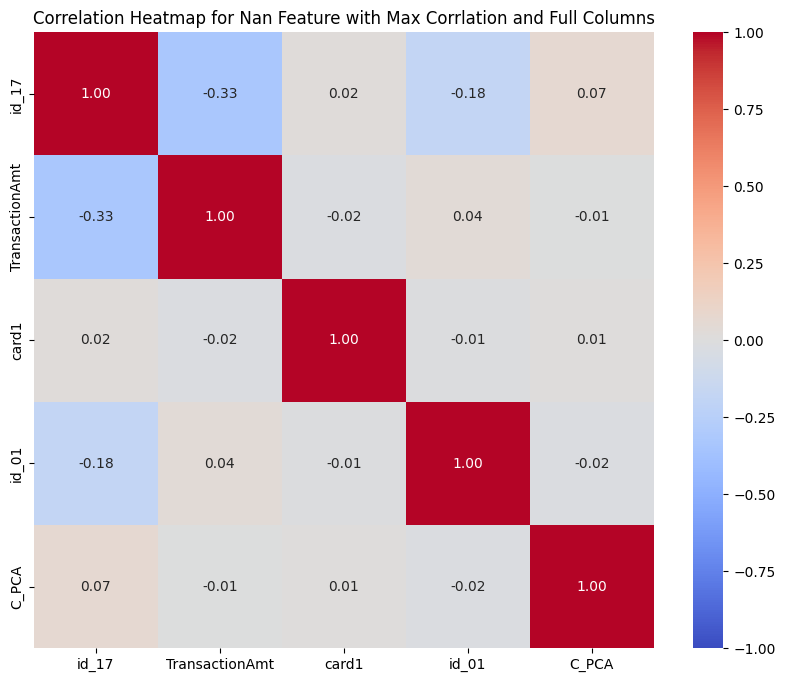

In [ ]:
corr_matrix = df_drop[["id_17"] + numerical_col_FULL[3:]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Nan Feature with Max Corrlation and Full Columns')
plt.show()

##### Filling Numerical features

In [ ]:
def fill_na_knn_regressor(df, feature_with_nan, non_nan_features,num):
    missing_mask = df[feature_with_nan].isna()
    X_train = df.loc[~missing_mask, non_nan_features]
    y_train = df.loc[~missing_mask, feature_with_nan]
    X_test = df.loc[missing_mask, non_nan_features]
    knn = KNeighborsRegressor(n_neighbors=num)
    knn.fit(X_train, y_train)
    df.loc[missing_mask, feature_with_nan] = knn.predict(X_test)
    return df

In [ ]:
for feature in numerical_col_NAN:
    if df_inner[feature].isna().sum() > 0:
        df_NAFill_Num = fill_na_knn_regressor(df_NAFill_Cat, feature, numerical_col_FULL[3:], num=5)

In [ ]:
df_NAFill = df_NAFill_Num.copy()

In [ ]:
df_NAFill.to_csv('Dataset_after_filling_NA.csv')

In [ ]:
df_NAFill = pd.read_csv('Dataset_after_filling_NA.csv').iloc[:, 1:]

### Correlation Check after Filling NA

In [ ]:
numerical_col = df_NAFill.columns[df_NAFill.dtypes != 'object']
new_column = [col for col in numerical_col if col != 'isFraud']
for i in range(len(new_column)):
    col = new_column[i]
    for j in range(i+1,len(new_column)):
        col2 = new_column[j]
        corr = df_NAFill[col].corr(df_NAFill[col2])
        if corr > 0.95:
            print(f'Correlation between {col} and {col2}: {corr}')

Correlation between TransactionID and TransactionDT: 0.9982919237633701
Correlation between V167 and V202: 0.9888934735703554
Correlation between V168 and V204: 0.9806130172161707
Correlation between V168 and V280: 0.9775852782113368
Correlation between V168 and V307: 0.9660567862883005
Correlation between V168 and V308: 0.9706738218582236
Correlation between V203 and V204: 0.9642209925382313
Correlation between V217 and V218: 0.9662689117838228
Correlation between V217 and V219: 0.9788908325004598
Correlation between V217 and V231: 0.9986811898471532
Correlation between V217 and V232: 0.9785351143471004
Correlation between V217 and V233: 0.979244111023459
Correlation between V217 and V273: 0.9856678427175654
Correlation between V217 and V275: 0.9620619831637289
Correlation between V218 and V219: 0.9920685574630799
Correlation between V218 and V231: 0.9619950489339711
Correlation between V218 and V232: 0.9879617718955886
Correlation between V218 and V233: 0.982549574164063
Correlation 

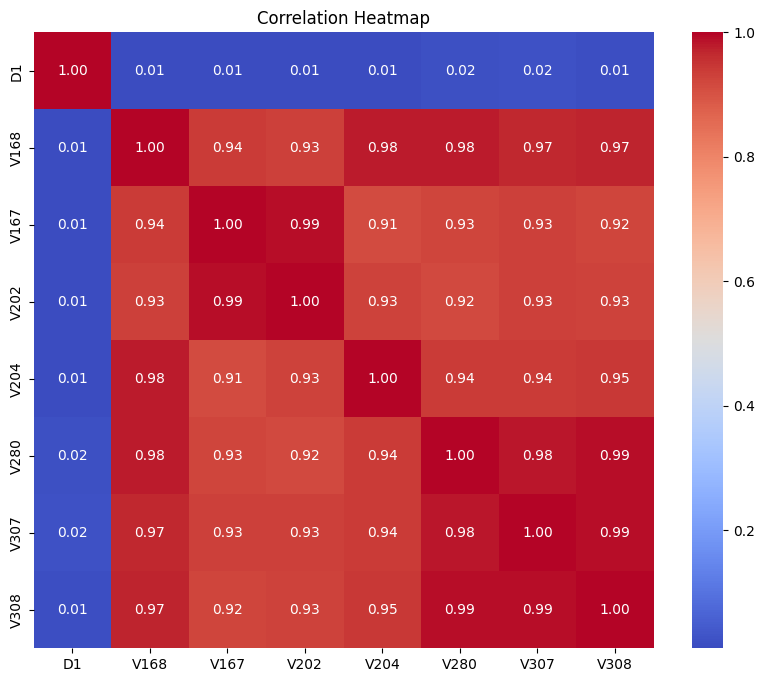

In [ ]:
cols_to_plot = ['D1','V168', 'V167', 'V202', 'V204', 'V280', 'V307', 'V308']

if not all(col in df_NAFill.columns for col in cols_to_plot):
    missing_cols = set(cols_to_plot) - set(df_NAFill.columns)
    print(f"Warning: The following columns are not present in the DataFrame: {missing_cols}")
    cols_to_plot = [col for col in cols_to_plot if col in df_NAFill.columns]
correlation_matrix = df_NAFill[cols_to_plot].corr()

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
new_PCA_list = ['V168', 'V167', 'V202', 'V204', 'V280', 'V307', 'V308']
V_X = df_NAFill.loc[:,new_PCA_list]
scaler = StandardScaler()
pca = PCA(n_components=1)
pca.fit(scaler.fit_transform(V_X))
V_PCA = pca.transform(V_X)

df_NAFill = df_NAFill.copy().drop(columns = new_PCA_list)
df_NAFill['V_PCA'] = V_PCA

df_NAFill.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'P_emaildomain', 'R_emaildomain', 'D1', 'V170', 'V171', 'V203', 'V217',
       'V218', 'V219', 'V221', 'V222', 'V224', 'V228', 'V229', 'V230', 'V231',
       'V232', 'V233', 'V245', 'V250', 'V251', 'V255', 'V256', 'V258', 'V259',
       'V261', 'V262', 'V263', 'V264', 'V265', 'V267', 'V273', 'V274', 'V275',
       'V282', 'V283', 'id_01', 'id_02', 'id_05', 'id_06', 'id_13', 'id_15',
       'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29', 'id_31', 'id_35',
       'id_37', 'id_38', 'DeviceType', 'C_PCA', 'V_PCA'],
      dtype='object')

## Outerlier detection
According to our project goal is detecting the fraud transactions which is a type of outlier detection. We choose to do the outlier detection based on single variable. We have used two ways to do the outliers detection.

### IQR Detects Outliers
Initially, we applied the IQR method for outlier detection. The results indicated that most numerical features contained  **15%~20%** outliers, suggesting that the IQR method was not effective for our dataset. A possible reason for this is that some features in the dataset exhibit **heavy-tailed** distributions, which can cause the IQR method to classify a large portion of the data as outliers.


In [ ]:
def find_outlier_indices(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
    return outlier_indices

In [ ]:
def draw_outlier_boxplot(df, feature):
    fig, ax = plt.subplots(figsize=(6, 20))
    ax.boxplot(x=df[feature])
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Value')
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
    outliers = df.loc[outlier_indices, feature]
    ax.legend()
    plt.show()

In [ ]:
outliers_map = {}
outliers_map = {}
numerical_col = df_NAFill.columns[df_NAFill.dtypes != 'object']
numerical_col_NAN = [col for col in numerical_col if col != 'isFraud']

for col in numerical_col_NAN:
    outliers = find_outlier_indices(df_NAFill, col)
    outliers_map[col] = outliers
for k,v in outliers_map.items():
    if v.shape[0] > 0:
        print(f'Percentages of outliers in {k} using IQR Detection: {round((len(v)/df_NAFill.shape[0])*100,2)}')

Percentages of outliers in TransactionAmt using IQR Detection: 6.0
Percentages of outliers in D1 using IQR Detection: 20.6
Percentages of outliers in V170 using IQR Detection: 28.55
Percentages of outliers in V171 using IQR Detection: 31.03
Percentages of outliers in V203 using IQR Detection: 17.93
Percentages of outliers in V217 using IQR Detection: 8.24
Percentages of outliers in V218 using IQR Detection: 12.0
Percentages of outliers in V219 using IQR Detection: 9.99
Percentages of outliers in V221 using IQR Detection: 42.37
Percentages of outliers in V222 using IQR Detection: 44.04
Percentages of outliers in V224 using IQR Detection: 17.27
Percentages of outliers in V228 using IQR Detection: 18.25
Percentages of outliers in V229 using IQR Detection: 24.44
Percentages of outliers in V230 using IQR Detection: 21.21
Percentages of outliers in V231 using IQR Detection: 16.6
Percentages of outliers in V232 using IQR Detection: 18.64
Percentages of outliers in V233 using IQR Detection: 17

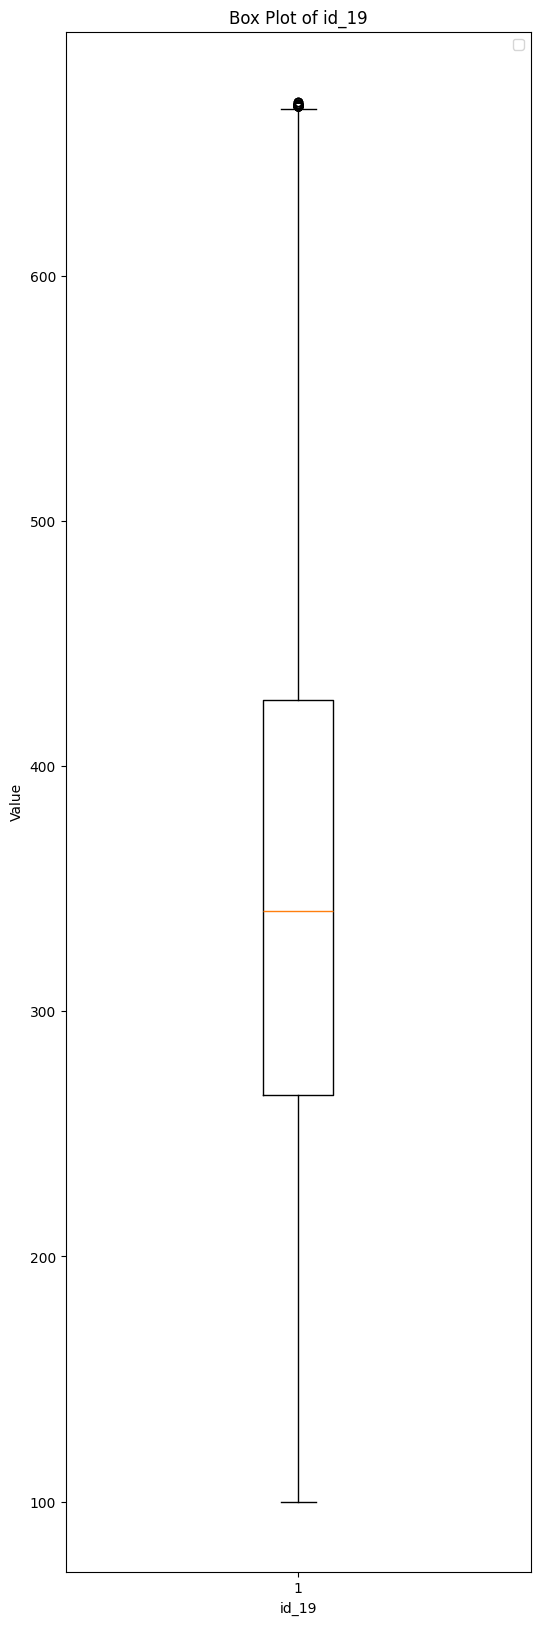

In [ ]:
draw_outlier_boxplot(df_NAFill, 'id_19')

### Z-score outlier detection
We then used the z-score method to identify outliers. The distribution of outliers detected using this method was more favorable than those identified using the IQR method, with most outliers comprising between **0.2% and 4%** of the data. After removing the outliers detected by the z-score, we recalculated the proportion of fraudulent transactions in the revised dataset. Compared to the original dataset, the new dataset exhibited a lower proportion of fraudulent transactions. This outcome is not ideal for our study, as our goal is to predict fraudulent transactions, and a decrease in the fraud rate could result in a less representative sample. The removal of these potential outliers might have inadvertently eliminated valuable information related to fraud, potentially reducing the model's ability to accurately identify fraudulent activities.


In [ ]:
def detect_outliers_zscore(df, feature, threshold=3):
    z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())
    outlier_indices = df[z_scores > threshold].index
    return outlier_indices

outliers_zscore_map = {}
for col in numerical_col_NAN:
    outliers_zscore = detect_outliers_zscore(df_NAFill, col)
    outliers_zscore_map[col] = outliers_zscore

for k,v in outliers_zscore_map.items():
    if v.shape[0] > 0:
        print(f'Percentages of outliers in {k} using Z-score: {len(v)/144233}')

Percentages of outliers in TransactionAmt using Z-score: 0.018768243051174142
Percentages of outliers in card3 using Z-score: 0.005726844758134408
Percentages of outliers in D1 using Z-score: 0.04226494630216386
Percentages of outliers in V170 using Z-score: 0.015669090984726103
Percentages of outliers in V171 using Z-score: 0.02264391644075905
Percentages of outliers in V203 using Z-score: 0.01189741598663274
Percentages of outliers in V217 using Z-score: 0.006149771550200024
Percentages of outliers in V218 using Z-score: 0.00698869190823182
Percentages of outliers in V219 using Z-score: 0.006281502846089314
Percentages of outliers in V221 using Z-score: 0.00753641677008729
Percentages of outliers in V222 using Z-score: 0.007779079683567561
Percentages of outliers in V224 using Z-score: 0.013096864101835226
Percentages of outliers in V228 using Z-score: 0.01596028648090243
Percentages of outliers in V229 using Z-score: 0.00574071121033328
Percentages of outliers in V230 using Z-score:

In [ ]:
outliers_index_list = []
for col in numerical_col_NAN:
    outliers_zscore = detect_outliers_zscore(df_NAFill, col)
    outliers_zscore_map[col] = outliers_zscore
    outliers_index_list.extend(outliers_zscore)
unique_outlier_index = set(outliers_index_list)

In [ ]:
print('After dropping the outliers')
df_NAFill.drop(list(unique_outlier_index))['isFraud'].value_counts(
    dropna=False, normalize = True)

After dropping the outliers


isFraud
0    0.937906
1    0.062094
Name: proportion, dtype: float64

In [ ]:
print('Before dropping the outliers detected by z-score')
df_NAFill['isFraud'].value_counts(dropna=False, normalize = True)

Before dropping the outliers detected by z-score


isFraud
0    0.92153
1    0.07847
Name: proportion, dtype: float64

### Isolation Forest outlier detection

After identifying outliers with extreme values in the single column, we also applied a multivariate outlier detection named Isolation Forest. This approach was implemented on data points labeled as non-fraudulent in the original dataset, which may prove helpful for further model training.

In [ ]:
new_df2 = df_NAFill.copy()

In [ ]:
normal_transactions = new_df2[new_df2['isFraud'] == 0]
features = [col for col in new_df2.columns if col != 'isFraud' and new_df2[col].dtype != 'object']


model = IsolationForest(contamination=0.1)
model.fit(normal_transactions[features])


outlier_scores = model.decision_function(normal_transactions[features])
normal_transactions['outlier_score'] = outlier_scores

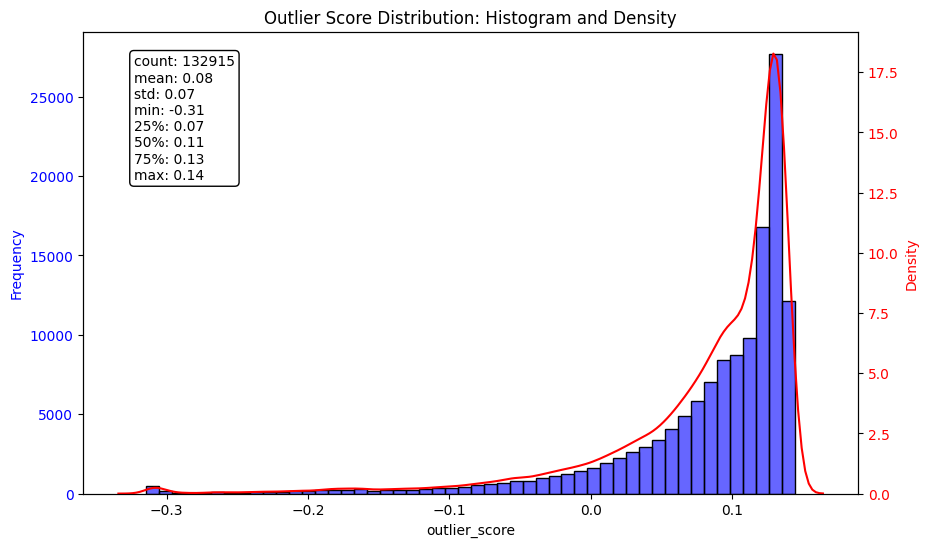

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
stats = normal_transactions['outlier_score'].describe()
stats_text = '\n'.join([
    f"count: {stats['count']:.0f}",f"mean: {stats['mean']:.2f}",f"std: {stats['std']:.2f}",
    f"min: {stats['min']:.2f}",f"25%: {stats['25%']:.2f}",f"50%: {stats['50%']:.2f}",f"75%: {stats['75%']:.2f}",f"max: {stats['max']:.2f}"
])

sns.histplot(
    normal_transactions['outlier_score'],bins=50,color='blue',alpha=0.6,ax=ax1)
ax1.set_ylabel('Frequency', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
sns.kdeplot(
    normal_transactions['outlier_score'],color='red',ax=ax2)
ax2.set_ylabel('Density', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Outlier Score Distribution: Histogram and Density')
plt.xlabel('Outlier Score')
plt.text(
    x=plt.xlim()[0]*0.9,y=plt.ylim()[1] * 0.95,s=stats_text,
    fontsize=10,color='black',verticalalignment='top',bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
plt.show()

As shown above,

In [ ]:
outlier_target_score = 0.09 - 3* 0.07
outliers = normal_transactions[normal_transactions['outlier_score'] < outlier_target_score]
print(len(outliers))

3370


In [ ]:
new_df2 = new_df2.drop(outliers.index) # Removing outliers from new_df2

## Encoding Categorical Data

Since our project involves two distinct approaches—classification in supervised learning and anomaly detection in unsupervised learning—we've selected two types of encoding methods:

 - Supervised encoding methods: CatBoost Encoding

 - Unsupervised encoding methods: One Hot Encoding


### Catboost Encoding

CatBoost Encoding is a method for transforming categorical features into numerical representations using **Ordered Target Statistics**. It is based on target statistics and follows the steps below:
	1.	Permuting the input data in a random order.
	2.	Transforming categorical features into numerical values using the formula:

$ctr_{i} = \frac{(totalCount + prior)}{(countInClass + 1)}$, where <br>
**totalCount**: The cumulative sum of target values for objects with the current categorical feature value, calculated only for objects processed before the current one (based on the shuffled order).<br>
**countInClass**: The total number of objects (up to the current one) that have the same categorical feature value as the current one.<br>
**prior**: A constant used for smoothing.<br>

Compared to typical Target Encoding, the value of CatBoost Encoding relies only on the observed history, ensuring that no row uses its own target value during encoding. This property is critical for improving model generalization and avoiding target leakage.

Due to the inclusion of the prior, CatBoost Encoding produces smoother and more stable encodings, especially for categories with few samples, compared to traditional Target Encoding.

In [ ]:
new_categorical = new_df2.columns[new_df2.dtypes == 'object']
catboost_encoder = CatBoostEncoder()
encode = catboost_encoder.fit_transform(new_df2[new_categorical], new_df2['isFraud'])
df_cat = new_df2.copy()
df_cat[new_categorical] = encode

### Onehot Encoding

In contrast, one-hot encoding is more suitable for unsupervised learning. Since it doesn’t rely on the target variable, it preserves the original category information without introducing any direct relationship with the target variable. This makes one-hot encoding a good fit for anomaly detection tasks where we want to avoid bias from the target variable.

In [ ]:
df_onehot = pd.get_dummies(new_df2, columns=new_categorical, dummy_na=False)

By implementing both methods, we would like to optimize data representation according to the unique requirements of each learning approach in our project.

# Model Training

### Help function

Before starting model training, we decided to further preprocess the input data, **X**.

Firstly, in addition to the target column, **“isFraud”**, we will also drop **“TransactionID”**, the original index from the dataset. For the column **“TransactionDT”**, which represents the time of each transaction, we will start by sorting the dataset using this column and then drop it for simplicity.

Secondly, considering the large number of numerical columns in the original dataset, feature scaling for each column is essential for machine learning model training. For this project, we implement z-score standardization.

In [ ]:
def X_y_train_test(df):
    X = df.sort_values('TransactionDT').drop((['isFraud', 'TransactionDT', 'TransactionID']), axis=1)
    y = np.array(df.sort_values('TransactionDT')['isFraud'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_scaled_train = scaler.fit_transform(X_train)
    X_scaled_test = scaler.fit_transform(X_test)
    return (X_scaled_train, X_scaled_test, y_train, y_test)

As a result, we evaluated the model using various evaluation metrics. In addition to common metrics such as Accuracy, F1 Score, and AUC-ROC Curve, we also implemented Specificity, Sensitivity, and MCC to address the imbalance within the dataset.

In [ ]:
def show_performance(y_test, y_pred):
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


    specificity = tn / (tn + fp)
    print(f"Specificity: {specificity:.2f}")
    print("Sensitivity:", recall)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("F1-score:", f1)
    print("MCC:", matthews_corrcoef(y_test, y_pred))

    print('')

    precision_l, recall_l, thresholds = precision_recall_curve(y_test, y_pred)
    pr_auc = auc(recall_l, precision_l)

    print("AUC-ROC:", roc_auc_score(y_test, y_pred))
    print("AUC-PR:", pr_auc)
    return specificity, recall, accuracy, precision, f1, matthews_corrcoef(y_test, y_pred), roc_auc_score(y_test, y_pred), pr_auc

This is the visualization function for the specific model's performance, including both the confusion matrix and the ROC curve with AUC labeled.

In [ ]:
def visual_performance(y_test, y_pred, y_pred_proba):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    if y_pred_proba is not None:

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)

        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    else:
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred)

        precision, recall, _ = precision_recall_curve(y_test, y_pred)

    pr_auc = auc(recall, precision)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()



    '''

    fig, axes = plt.subplots(1, 1, figsize=(8, 6))

    axes[0].plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', lw=2)
    axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    axes[0].set_xlim([0.0, 1.0])
    axes[0].set_ylim([0.0, 1.05])
    axes[0].set_xlabel('False Positive Rate (FPR)')
    axes[0].set_ylabel('True Positive Rate (TPR)')
    axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[0].legend(loc='lower right')
    axes[0].grid(alpha=0.3)

    axes[1].plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})', lw=2)
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Precision-Recall Curve')
    axes[1].legend(loc='lower left')
    axes[1].grid(alpha=0.3)'''

    plt.tight_layout()
    plt.show()

In [ ]:
def draw_parameter_scores(scores_df):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(scores_df)), scores_df['mean_test_score'], tick_label=scores_df['params'], align='center')
    plt.xticks(rotation=90)
    plt.ylabel('Mean Test Score')
    plt.xlabel('Parameter Set')
    plt.title('Scores for Parameter Sets in HalvingGridSearchCV')
    plt.tight_layout()
    plt.show()


In [ ]:
def draw_3d_plot(score_df, parameter_col, target_col):
    grouped_df = score_df.groupby(parameter_col, as_index=False)[target_col].mean()
    X = grouped_df[parameter_col[0]]
    Y = grouped_df[parameter_col[1]]
    Z = grouped_df[parameter_col[2]]
    T = grouped_df[target_col]
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X, Y, Z, c=T, cmap='viridis', s=100)
    ax.set_xlabel(parameter_col[0].replace('sgd__', ''))
    ax.set_ylabel(parameter_col[1].replace('sgd__', ''))
    ax.set_zlabel(parameter_col[2].replace('sgd__', ''))
    ax.set_title('3D Plot of Mean Test Score')
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
    cbar.set_label('Mean Test Score', rotation=270, labelpad=15)
    plt.show()

In [ ]:
def random_search_hyperparameter_tuning(pipeline, param_grid, X, y, custom_scorer, n_iter=10):
    best_score = -float('inf')
    best_params = {}
    for _ in range(n_iter):
        params = {}
        for param_name, param_values in param_grid.items():
            params[param_name] = random.choice(param_values)
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        pipeline.set_params(**params)
        pipeline.fit(X_train)
        y_pred = pipeline.fit_predict(X_val)
        # y_pred = pipeline.predict(X_val)
        score = custom_scorer(y_pred,y_val)
        if score > best_score:
            best_score = score
            best_params = params

    return best_params, best_score

In [ ]:
def custom_scoring(y_pred,y_train):
    y_pred = [1 if p == -1 else 0 for p in y_pred]
    if len(set(y_train)) < 2 or len(set(y_train)) < 2:
        return 0  # Avoid NaN if no anomalies are predicted or present
    return average_precision_score(y_train,y_pred)


In [ ]:
def custom_scoring2(y_pred, y_train ):
    y_pred = [1 if p == -1 else 0 for p in y_pred]
    if len(set(y_train)) < 2 or len(set(y_train)) < 2:
        return 0  # Avoid NaN if no anomalies are predicted or present
    return accuracy_score(y_true=y_train, y_pred = y_pred)

In [ ]:
para_model = {}

In [ ]:
model_performance = {}

### Data Oversampling
Our project implemented several machine learning methods for fraud detection in the financial market. Given the imbalanced dataset, a key challenge for supervised learning methods is improving their performance on the minority class—in our case, correctly identifying fraudulent activities.

One approach to addressing imbalanced datasets is to oversample the minority class. The Synthetic Minority Oversampling Technique (SMOTE) is a popular data augmentation method that generates synthetic examples for the minority class. The detailed procedure for SMOTE is outlined below:

A random example from the minority class is chosen.
Then, k nearest neighbors for that example are identified (typically, k = 5).
A random neighbor is selected, and a synthetic example is created at a randomly chosen point between the two examples in feature space.


In [ ]:
oversample = SMOTE()
X_ori_train, X_test, y_ori_train, y_test = X_y_train_test(df_cat)
X_train, y_train = oversample.fit_resample(X_ori_train, y_ori_train)

### SVM

SVM is a supervised learning model. In our project, we use it to classify normal transactions and fraud transactions. SVM focuses on finding the maximum separating hyperplane between the different classes in the target feature. To achieve faster training, we utilize the SGDClassifier and set the loss function to hinge, effectively training an SVM with improved efficiency.

Hyperparameter Selection:

**sgd_alpha**: weight of the regularization term

**sgd_learning rate**: different learning rate schedule

**sgd_max iter**: The maximum number of epochs

**sgd_eta0**: for 'constant', 'invscaling' and 'adaptive' initial learning rate.

**sgd_tol**: The stopping criterion.

In [ ]:
param_svm = {
    'pca__n_components': [5, 10, 15, 20, 25],
    'sgd__alpha': [0.0001, 0.001, 0.01,0.005, 0.0005],
    'sgd__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'sgd__max_iter': [500, 1000, 2000, 3000],
    'sgd__eta0': [0.001, 0.01, 0.1],
    'sgd__tol': [0.0001, 0.001, 0.01]
}
pipeline = Pipeline([
    ('pca', PCA()),
    ('sgd', SGDClassifier(random_state=42, penalty='elasticnet', loss='hinge'))
])

###### RandomSearch

In [ ]:
random_search = RandomizedSearchCV(pipeline, param_svm, n_iter=10, cv=5, scoring='recall', random_state=42)
random_search.fit(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
best_sgd_classifier = random_search.best_estimator_
y_pred = best_sgd_classifier.predict(X_test)
y_pred_proba = best_sgd_classifier.decision_function(X_test)
para_model['svm_rm_classifier'] = best_sgd_classifier
joblib.dump(best_sgd_classifier, 'svm_model.pkl')

Best Hyperparameters: {'sgd__tol': 0.0001, 'sgd__max_iter': 1000, 'sgd__learning_rate': 'constant', 'sgd__eta0': 0.01, 'sgd__alpha': 0.0005, 'pca__n_components': 25}
Best Score: 0.7418327275965696


['svm_model.pkl']

In [ ]:
specificity, recall, accuracy, precision, f1, mcc, roc_auc, pr_auc = show_performance(y_test, y_pred)
model_performance['svm_rm_classifier'] = [specificity, recall, accuracy, precision, f1, mcc, roc_auc, pr_auc]

Specificity: 0.66
Sensitivity: 0.7517482517482518
Accuracy: 0.6658154217209336
Precision: 0.1626631359939474
F1-score: 0.26745451718239777
MCC: 0.23123951764754389

AUC-ROC: 0.704987072681815
AUC-PR: 0.467278759062275


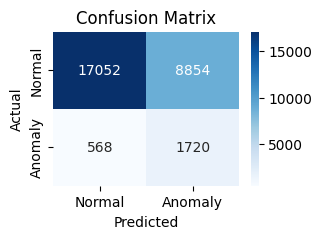

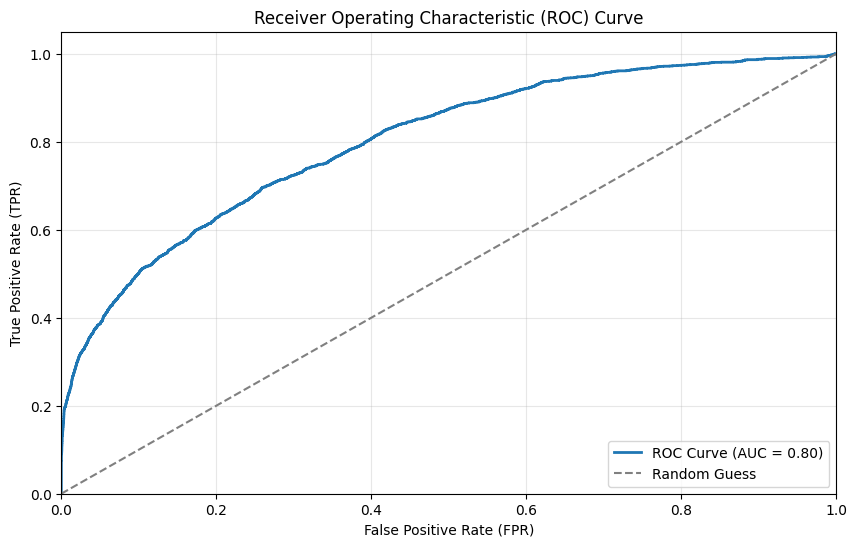

<Figure size 640x480 with 0 Axes>

In [ ]:
visual_performance(y_test, y_pred, y_pred_proba)

### NN

A Neural Network is a computational model inspired by the structure and function of the human brain. It has input layers, hidden layers, and output layer. We use keras in our project to help us build NN model. As for the input layer and hidden layer, we choose relu as the activation function.

**ReLu formula:** $f(x) = max(0,x)$

And we choose sigmoid as the activation function of the output layer.

**Sigmoid formula**: $f(x) = 1 / (1 + e^{-x})$

During model training, we use early stopping to prevent overfitting.

**units**: the number of nodes in the layer.

**dropout**: primarily used in neural networks as a regularization technique.

**batch size**: determines the number of examples used to compute the gradients and update the parameters in each iteration.

**epochs**: determine the number of complete neural network model trainings pass through the entire training dataset

In [ ]:
def build_model(hyperparams):
    model = keras.Sequential([
        layers.Dense(hyperparams['units_1'], activation='relu', input_shape=(63,)),
        layers.Dropout(hyperparams['dropout_1']),
        layers.Dense(hyperparams['units_2'], activation='relu'),
        layers.Dropout(hyperparams['dropout_2']),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.01),
        loss='binary_crossentropy',
        metrics=[
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(curve='PR', name='pr_auc')]
    )
    return model

In [ ]:
def nn_random_search(X_train,y_train, param_space, n_iter=10):
    best_score = -float('inf')
    best_params = {}
    new_X_train, X_test, new_y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    # print(type(new_y_train))
    for trial in range(n_iter):
        params = {k: random.choice(v) for k, v in param_space.items()}
        print(f"Trial {trial + 1}: Testing with parameters {params}")
        model = build_model(params)
        batch_size = params["batch_size"]
        num_epochs = params["epochs"]
        early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
        history = model.fit(new_X_train, new_y_train, validation_split=0.2, batch_size=batch_size,verbose=0, epochs=num_epochs,callbacks=[early_stopping])
        # history = model.fit(new_X_train, new_y_train, validation_split=0.2, batch_size=batch_size, epochs=num_epochs)
        loss, precision, recall, PR_AUC = model.evaluate(X_test, y_test,verbose=0)

        print(f"Trial {trial + 1} - Loss: {loss:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, PR_AUC: {PR_AUC:.4f}")
        if PR_AUC > best_score:
            best_score = PR_AUC
            best_params = params
            best_history = history
    print(f"\nBest Parameters: {best_params}")
    print(f"Best Score: {best_score:.4f}")
    return best_params, best_score, best_history


In [ ]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [ ]:
# Hyperparameter space
param_space = {
    'units_1': [64, 128, 256],
    'units_2': [32, 64, 128],
    "dropout_1": [ 0.2, 0.3, 0.4],
    "dropout_2": [0.1, 0.2, 0.3],
    "batch_size": [16, 32, 64],
    "epochs": [25,50,75]
}

#### Random Search

In [ ]:
nn_best_params, nn_best_score,history = nn_random_search(X_train, y_train, param_space, n_iter=10)
best_nn_classifier = history.model
joblib.dump(best_nn_classifier, 'nn_rm_model.pkl')

<class 'numpy.ndarray'>
Trial 1: Testing with parameters {'units_1': 64, 'units_2': 32, 'dropout_1': 0.3, 'dropout_2': 0.2, 'batch_size': 64, 'epochs': 25}
Trial 1 - Loss: 0.2674, Precision: 0.9031, Recall: 0.8580, PR_AUC: 0.9588
Trial 2: Testing with parameters {'units_1': 256, 'units_2': 32, 'dropout_1': 0.3, 'dropout_2': 0.3, 'batch_size': 16, 'epochs': 75}
Trial 2 - Loss: 0.3523, Precision: 0.7810, Recall: 0.9307, PR_AUC: 0.9239
Trial 3: Testing with parameters {'units_1': 256, 'units_2': 64, 'dropout_1': 0.2, 'dropout_2': 0.3, 'batch_size': 32, 'epochs': 75}
Trial 3 - Loss: 0.2609, Precision: 0.8694, Recall: 0.9223, PR_AUC: 0.9632
Trial 4: Testing with parameters {'units_1': 128, 'units_2': 128, 'dropout_1': 0.4, 'dropout_2': 0.3, 'batch_size': 32, 'epochs': 50}
Trial 4 - Loss: 0.2745, Precision: 0.8764, Recall: 0.8872, PR_AUC: 0.9575
Trial 5: Testing with parameters {'units_1': 128, 'units_2': 128, 'dropout_1': 0.3, 'dropout_2': 0.3, 'batch_size': 32, 'epochs': 75}
Trial 5 - Loss

['nn_rm_model.pkl']

882/882 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Specificity: 0.88
Sensitivity: 0.8229895104895105
Accuracy: 0.8780236929843229
Precision: 0.38295708765507425
F1-score: 0.5226925746009715
MCC: 0.5079741778007332

AUC-ROC: 0.8529368922014448
AUC-PR: 0.6101556783019157


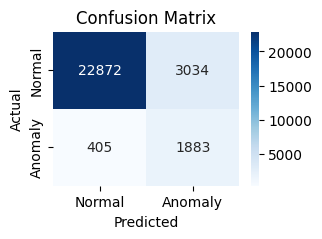

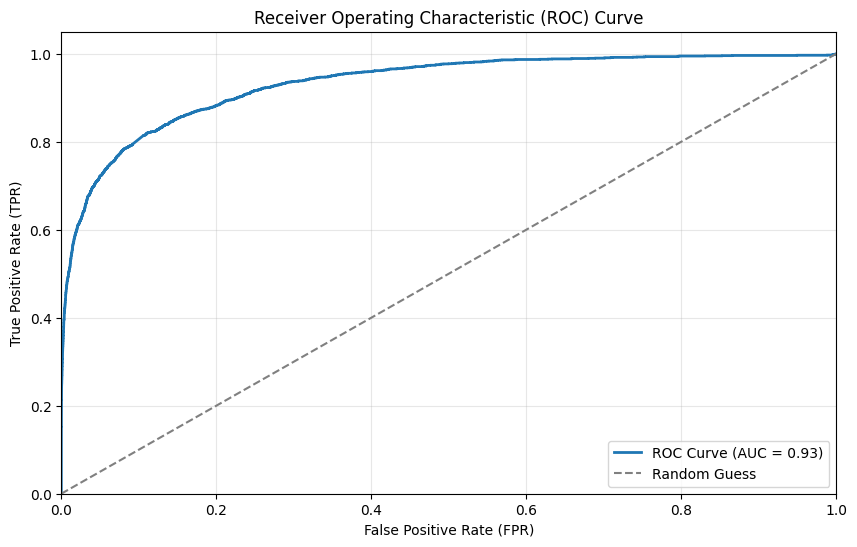

<Figure size 640x480 with 0 Axes>

In [ ]:
y_pred_probs = best_nn_classifier.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
specificity, recall, accuracy, precision, f1, mcc, roc_auc, pr_auc = show_performance(y_test, y_pred)
para_model['nn_rm_classifier'] = best_nn_classifier
model_performance['nn_rm_classifier'] = [specificity, recall, accuracy, precision, f1, mcc, roc_auc, pr_auc]
visual_performance(y_test, y_pred, y_pred_probs)

### LightGBM

Compared to XGBoost, LightGBM is a histogram-based algorithm. It buckets continuous feature (attribute) values into discrete bins, which speeds up training and reduces memory usage. Additionally, it uses a leaf-wise approach to build each decision tree, rather than the level-wise approach.

Given that LightGBM performs well on time series datasets, we considered incorporating the time series feature, "TransactionDT", from the original dataset to explore better performance.

In [ ]:
oversample = SMOTE()
X = df_cat.drop((['isFraud', 'TransactionID']), axis=1)
X_ori_train, X_test, y_ori_train, y_test = train_test_split(X, df_cat['isFraud'], test_size=0.2, random_state=42)
X_train, y_train = oversample.fit_resample(X_ori_train, y_ori_train)

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)
param_lgm = {
    'pca__n_components': [10, 20, 30],
    'lgbm__num_leaves': [31, 50, 80],
    'lgbm__n_estimators': [150, 200],
    'lgbm__min_child_samples': [5, 10],
    'lgbm__max_depth': [-1, 10, 20],
    'lgbm__learning_rate': [0.1, 0.5],
    'lgbm__feature_fraction': [1.0, 0.8],
    'lgbm__bagging_freq': [5, 10],
    'lgbm__bagging_fraction': [1.0, 0.8],
}
pipeline = Pipeline([
    ('pca', PCA()),
    ('lgbm', lgb.LGBMClassifier(verbose=-1, n_jobs = -1))
])

#### Random Search

In [ ]:
random_search = RandomizedSearchCV(pipeline, param_lgm, n_iter=10, cv=5, scoring='average_precision', random_state=42)
random_search.fit(X_train,y_train)
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
best_lgbm_classifier = random_search.best_estimator_
y_pred = best_lgbm_classifier.predict(X_test)
para_model['lgbm_rm_classifier'] = best_lgbm_classifier
joblib.dump(best_lgbm_classifier, 'lgbm_model.pkl')

Best Hyperparameters: {'pca__n_components': 30, 'lgbm__num_leaves': 50, 'lgbm__n_estimators': 200, 'lgbm__min_child_samples': 10, 'lgbm__max_depth': 20, 'lgbm__learning_rate': 0.5, 'lgbm__feature_fraction': 0.8, 'lgbm__bagging_freq': 10, 'lgbm__bagging_fraction': 1.0}
Best Score: 0.9875085563602821


['lgbm_model.pkl']

Specificity: 0.96
Sensitivity: 0.6473275468250342
Accuracy: 0.9365488506761767
Precision: 0.5802620802620803
F1-score: 0.6119628589937378
MCC: 0.5785490832906175

AUC-ROC: 0.8040518034140478
AUC-PR: 0.6274242757800603


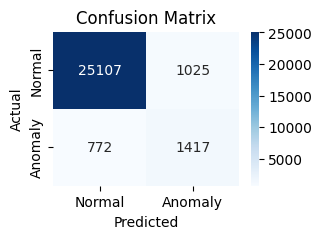

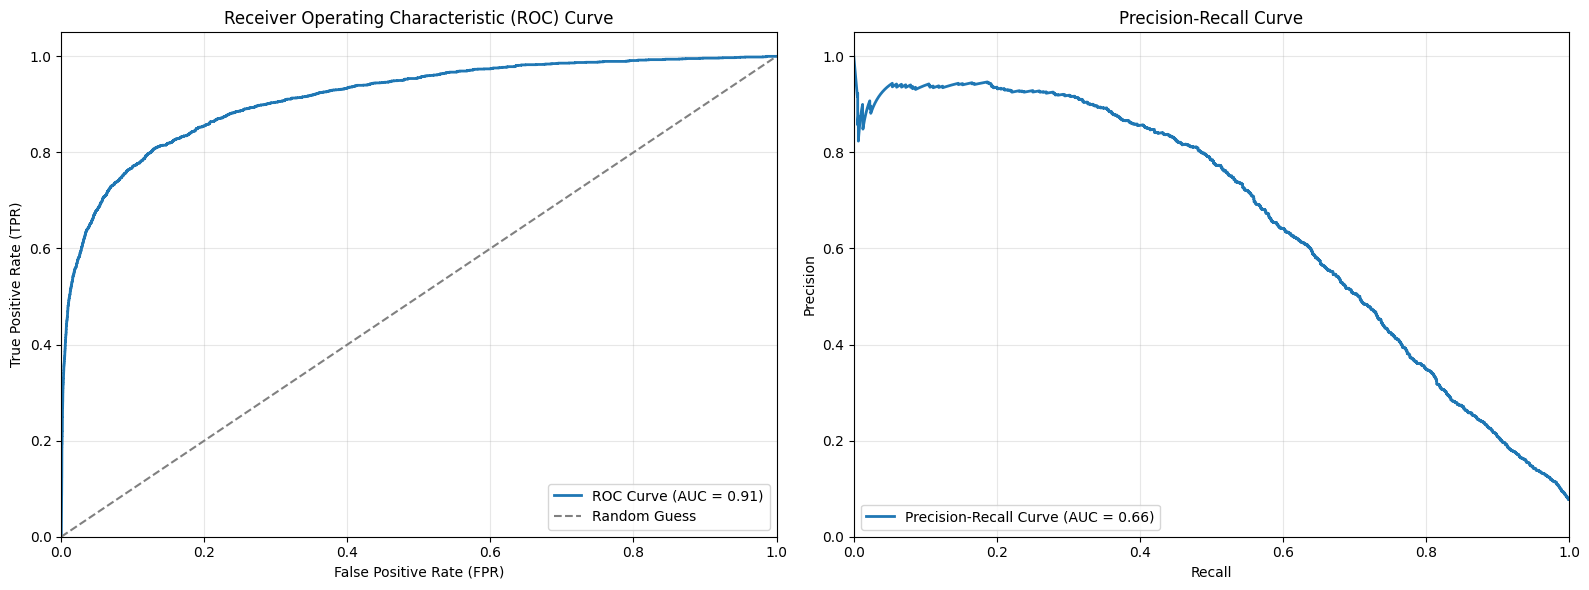

In [ ]:
y_pred_proba = best_lgbm_classifier.predict_proba(X_test)[:, 1]
specificity, recall, accuracy, precision, f1, mcc, roc_auc, pr_auc = show_performance(y_test, y_pred)
model_performance['lgbm_rm_classifier'] = [specificity,recall, accuracy, precision, f1, mcc, roc_auc, pr_auc]
visual_performance(y_test, y_pred, y_pred_proba)

After performing Random Search on hyperparameters, we decided to implement Halving Grid Search for LightGBM and visualize how the model performs during the hyperparameter tuning process.

#### Halving Grid Search

In [ ]:
halving_search = HalvingGridSearchCV(
    pipeline,
    param_grid=param_lgm,
    cv=5,
    scoring='average_precision',
    random_state=42,
    factor=2,
    resource='n_samples'
)
halving_search.fit(X_train, y_train)

HalvingGridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                              ('lgbm',
                                               LGBMClassifier(n_jobs=-1,
                                                              verbose=-1))]),
                    factor=2,
                    param_grid={'lgbm__bagging_fraction': [1.0, 0.8],
                                'lgbm__bagging_freq': [5, 10],
                                'lgbm__feature_fraction': [1.0, 0.8],
                                'lgbm__learning_rate': [0.1, 0.5],
                                'lgbm__max_depth': [-1, 10, 20],
                                'lgbm__min_child_samples': [5, 10],
                                'lgbm__n_estimators': [150, 200],
                                'lgbm__num_leaves': [31, 50, 80],
                                'pca__n_components': [10, 20, 30]},
                    random_state=42, scoring='average_precision')

In [ ]:
print("Best Hyperparameters:", halving_search.best_params_)
print("Best Score:", halving_search.best_score_)
best_lgbm_classifier = halving_search.best_estimator_
y_pred = best_lgbm_classifier.predict(X_test)
joblib.dump(best_lgbm_classifier, 'lgbm_model.pkl')
para_model['LGBM_halving'] = best_lgbm_classifier
y_pred_proba = best_lgbm_classifier.predict_proba(X_test)[:, 1]
specificity, recall, accuracy, precision, f1, mcc, roc_auc, pr_auc = show_performance(y_test, y_pred)
model_performance['lgbm_rm_classifier'] = [specificity,recall, accuracy, precision, f1, mcc, roc_auc, pr_auc]

Best Hyperparameters: {'lgbm__bagging_fraction': 0.8, 'lgbm__bagging_freq': 5, 'lgbm__feature_fraction': 1.0, 'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 20, 'lgbm__min_child_samples': 10, 'lgbm__n_estimators': 200, 'lgbm__num_leaves': 80, 'pca__n_components': 30}
Best Score: 0.9750280752225897
Specificity: 0.91
Sensitivity: 0.7433510638297872
Accuracy: 0.8975606316976875
Precision: 0.41883116883116883
F1-score: 0.5357827476038338
MCC: 0.5083958846702046

AUC-ROC: 0.8271174743168545
AUC-PR: 0.5912962770749788


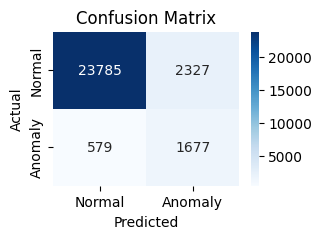

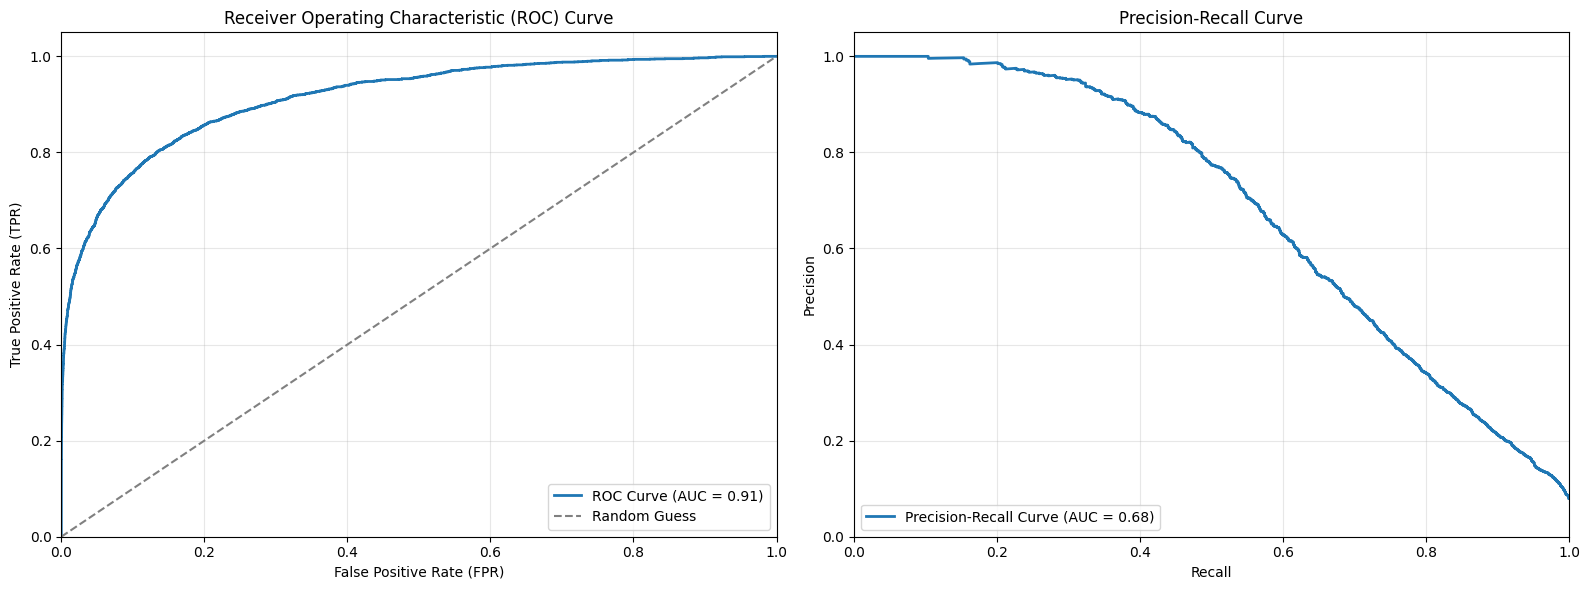

In [ ]:
visual_performance(y_test, y_pred, y_pred_proba)

After conducting Halving Grid Search, we decided to visualize the model's performance throughout the hyperparameter tuning process using two main types of graphs:

1. **Hyperparameter Distribution and Importance**: After hyperparameter tuning, we selected the top 100 models with the best-ranked test scores and analyzed the distribution of each hyperparameter. We assumed that hyperparameters with more sparse distributions are more important to tune. To identify the top three most important hyperparameters, we created a 3D plot to visualize how the model performs across different combinations of these hyperparameters.

2. **Detailed Performance Distribution**: In addition to the 3D plot, we visualized the detailed distribution of model performance for each hyperparameter at each given value.

In [ ]:
def show_parameter_scores(search_model):
    results = search_model.cv_results_
    scores_df = pd.DataFrame({
        'params': results['params'],
        'mean_test_score': results['mean_test_score'],
        'std_test_score': results['std_test_score'],
        'rank_test_score': results['rank_test_score']
    })
    scores_df = scores_df.sort_values(by='rank_test_score')
    return scores_df

In [ ]:
def extract_and_plot_parameter_distributions(scores_df, top_n=100):
  param_values = [params for params in scores_df['params'].iloc[:top_n]]
  param_dict = {}
  for params in param_values:
      for key, value in params.items():
          if key not in param_dict:
              param_dict[key] = []
          param_dict[key].append(value)
  for param_name, values in param_dict.items():
      plt.figure(figsize=(8, 6))
      sns.histplot(values)
      plt.title(f'Distribution of {param_name}')
      plt.xlabel(param_name)
      plt.ylabel('Frequency')
      plt.show()



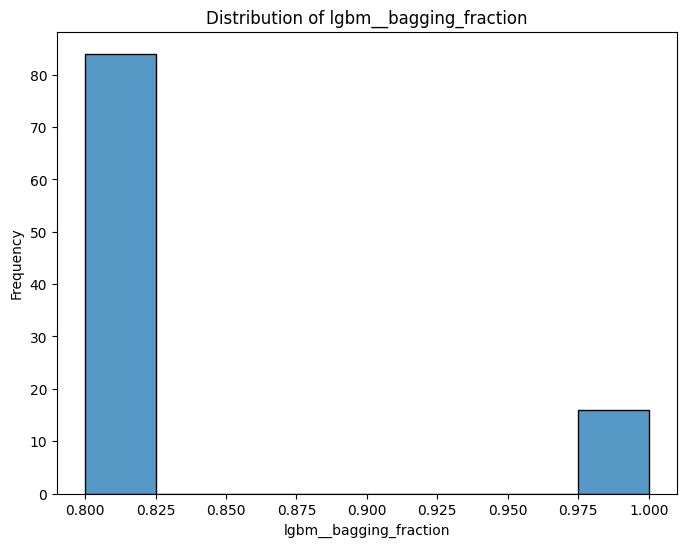

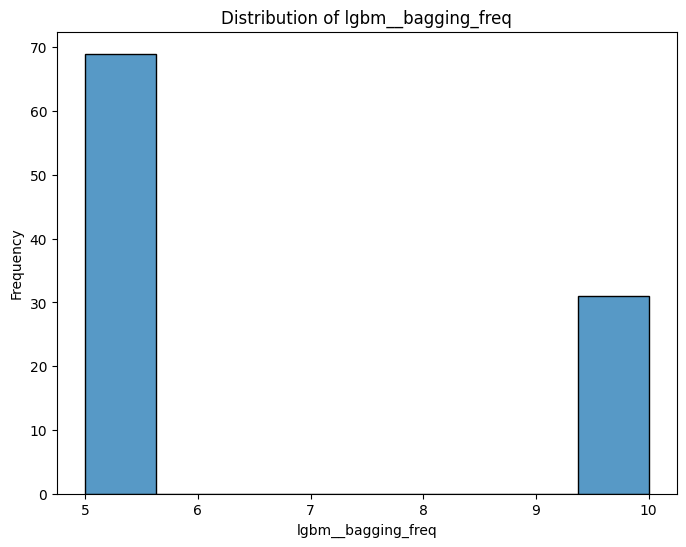

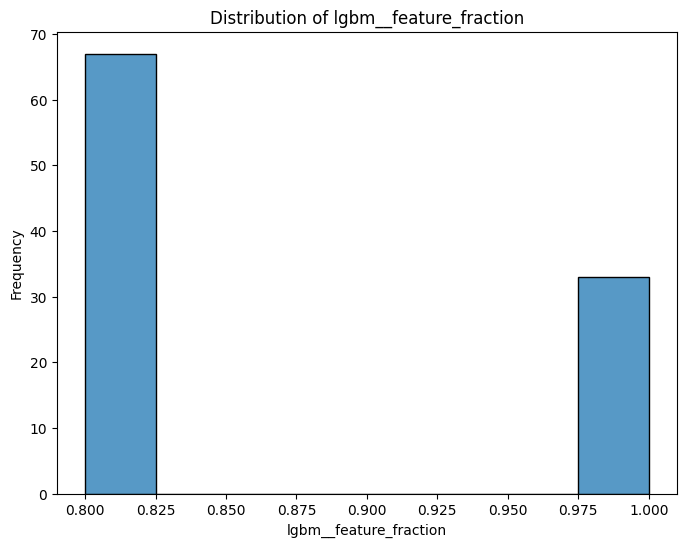

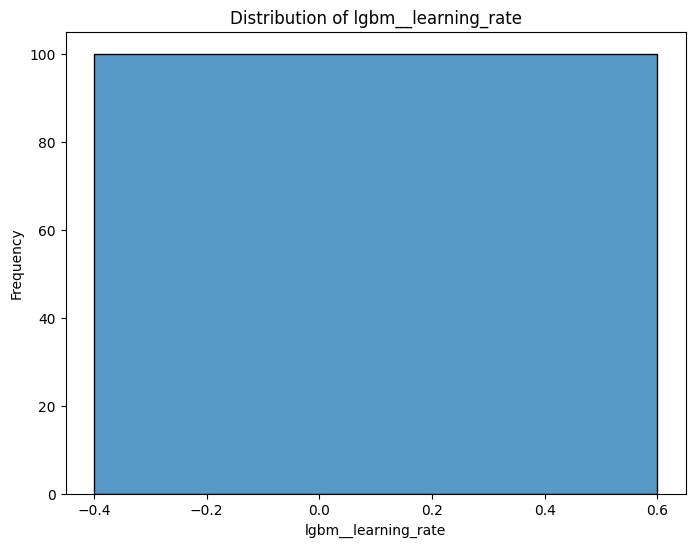

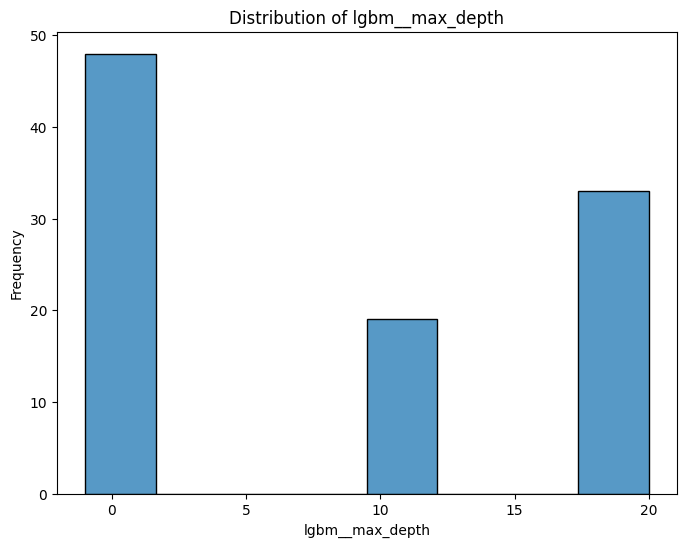

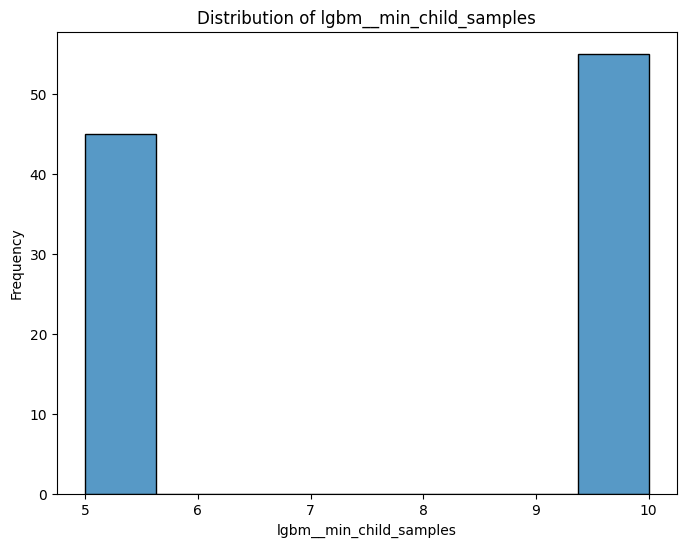

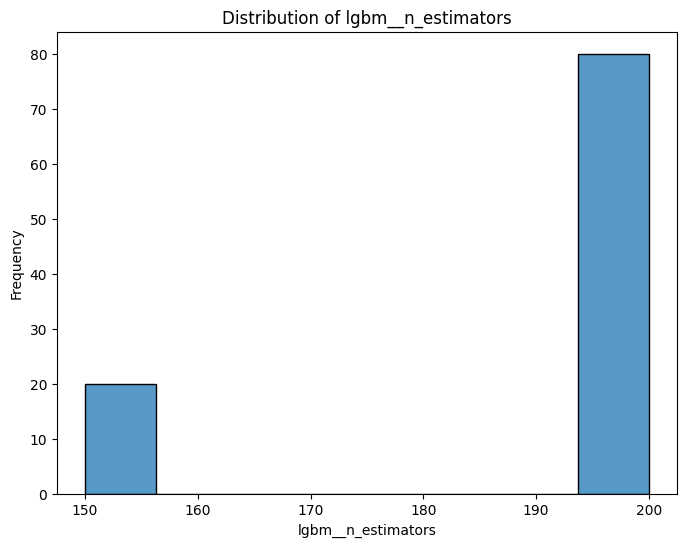

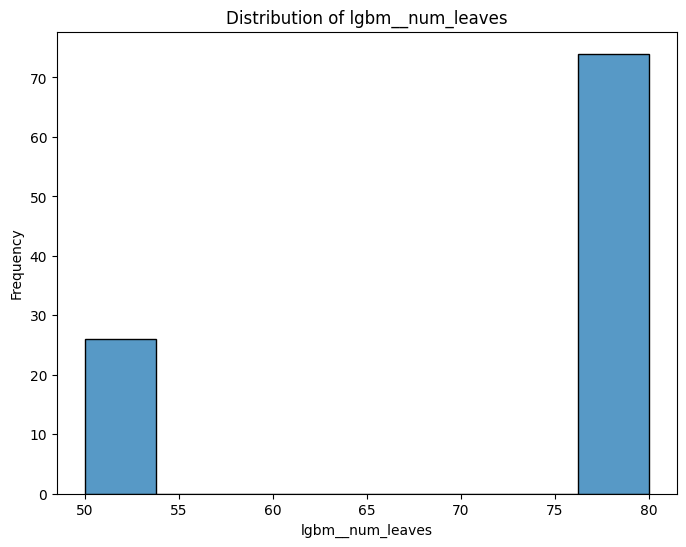

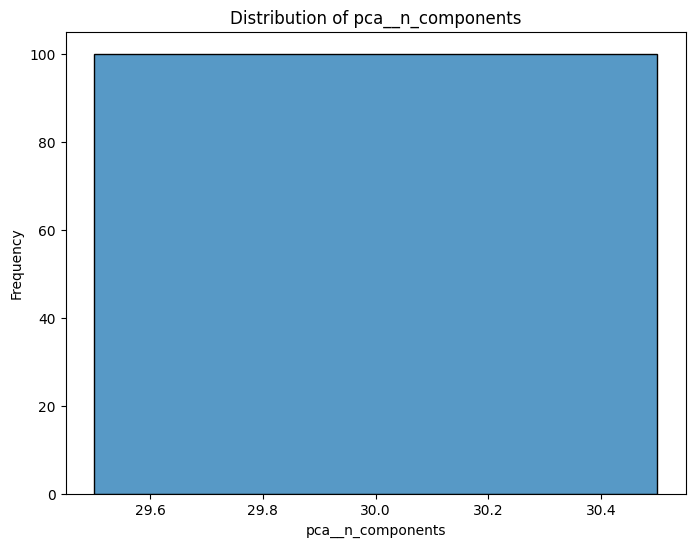

In [ ]:
score_df = show_parameter_scores(halving_search)
extract_and_plot_parameter_distributions(score_df)

In [ ]:
expanded_params = pd.json_normalize(score_df['params'])
score_df = pd.concat([score_df.drop(columns=['params']), expanded_params], axis=1)
score_df

mean_test_score  std_test_score  rank_test_score  \
3454         0.975028        0.002011                1   
3455         0.974721        0.002050                2   
3451         0.971329        0.002226                3   
3453         0.971301        0.001963                4   
3452         0.971238        0.002262                5   
...               ...             ...              ...   
1673         0.554597        0.067675             3451   
1664         0.554597        0.067675             3451   
1658         0.554597        0.067675             3451   
1670         0.554597        0.067675             3451   
1661         0.554597        0.067675             3451   

      lgbm__bagging_fraction  lgbm__bagging_freq  lgbm__feature_fraction  \
3454                     0.8                  10                     0.8   
3455                     0.8                  10                     0.8   
3451                     0.8                  10                     0.8   
3453                     0.8                  10                     0.8   
3452                     0.8                  10                     0.8   
...                      ...                 ...                     ...   
1673                     1.0                  10                     1.0   
1664                     0.8                   5                     1.0   
1658                     1.0                  10                     0.8   
1670                     1.0                   5                     1.0   
1661                     0.8                  10                     0.8   

      lgbm__learning_rate  lgbm__max_depth  lgbm__min_child_samples  \
3454                  0.5               10                        5   
3455                  0.5               10                        5   
3451                  0.5               10                        5   
3453                  0.5               10                        5   
3452                  0.5               10                        5   
...                   ...              ...                      ...   
1673                  0.1               10                        5   
1664                  0.1               10                       10   
1658                  0.1               10                       10   
1670                  0.1               10                        5   
1661                  0.1               10                        5   

      lgbm__n_estimators  lgbm__num_leaves  pca__n_components  
3454                 200                50                 30  
3455                 150                50                 30  
3451                 200                80                 30  
3453                 150                31                 30  
3452                 150                80                 30  
...                  ...               ...                ...  
1673                 150                80                 30  
1664                 200                80                 30  
1658                 150                80                 30  
1670                 150                50                 20  
1661                 150                31                 30  

[3456 rows x 12 columns]

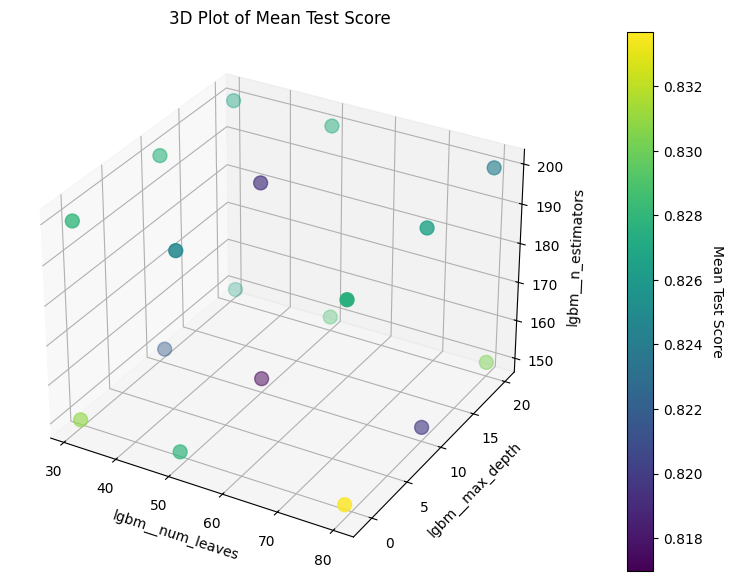

In [ ]:
parameter_col = ['lgbm__num_leaves', 'lgbm__max_depth','lgbm__n_estimators']
target_col = 'mean_test_score'
draw_3d_plot(score_df, parameter_col, target_col)

In [ ]:
total_score_df = show_parameter_scores(halving_search)
expanded_params = pd.json_normalize(total_score_df['params'])
total_score_df = pd.concat([total_score_df.drop(columns=['params']), expanded_params], axis=1)
total_score_df.to_csv('total_score_df.csv', index=False)

In [ ]:
total_score_df

mean_test_score  std_test_score  rank_test_score  \
3454         0.975028        0.002011                1   
3455         0.974721        0.002050                2   
3451         0.971329        0.002226                3   
3453         0.971301        0.001963                4   
3452         0.971238        0.002262                5   
...               ...             ...              ...   
1673         0.554597        0.067675             3451   
1664         0.554597        0.067675             3451   
1658         0.554597        0.067675             3451   
1670         0.554597        0.067675             3451   
1661         0.554597        0.067675             3451   

      lgbm__bagging_fraction  lgbm__bagging_freq  lgbm__feature_fraction  \
3454                     0.8                  10                     0.8   
3455                     0.8                  10                     0.8   
3451                     0.8                  10                     0.8   
3453                     0.8                  10                     0.8   
3452                     0.8                  10                     0.8   
...                      ...                 ...                     ...   
1673                     1.0                  10                     1.0   
1664                     0.8                   5                     1.0   
1658                     1.0                  10                     0.8   
1670                     1.0                   5                     1.0   
1661                     0.8                  10                     0.8   

      lgbm__learning_rate  lgbm__max_depth  lgbm__min_child_samples  \
3454                  0.5               10                        5   
3455                  0.5               10                        5   
3451                  0.5               10                        5   
3453                  0.5               10                        5   
3452                  0.5               10                        5   
...                   ...              ...                      ...   
1673                  0.1               10                        5   
1664                  0.1               10                       10   
1658                  0.1               10                       10   
1670                  0.1               10                        5   
1661                  0.1               10                        5   

      lgbm__n_estimators  lgbm__num_leaves  pca__n_components  
3454                 200                50                 30  
3455                 150                50                 30  
3451                 200                80                 30  
3453                 150                31                 30  
3452                 150                80                 30  
...                  ...               ...                ...  
1673                 150                80                 30  
1664                 200                80                 30  
1658                 150                80                 30  
1670                 150                50                 20  
1661                 150                31                 30  

[3456 rows x 12 columns]

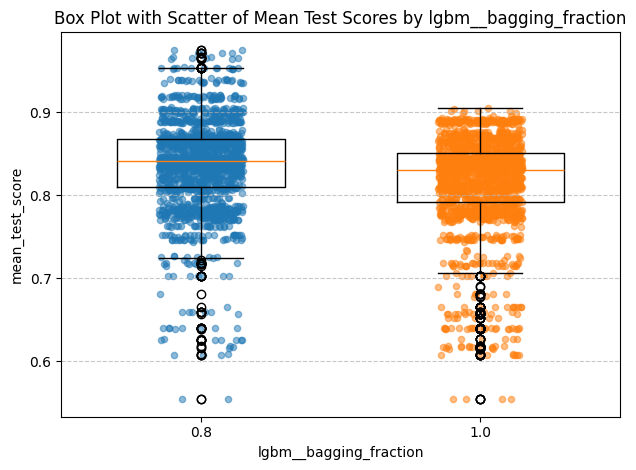

lgbm__bagging_fraction: [0.8 1. ]


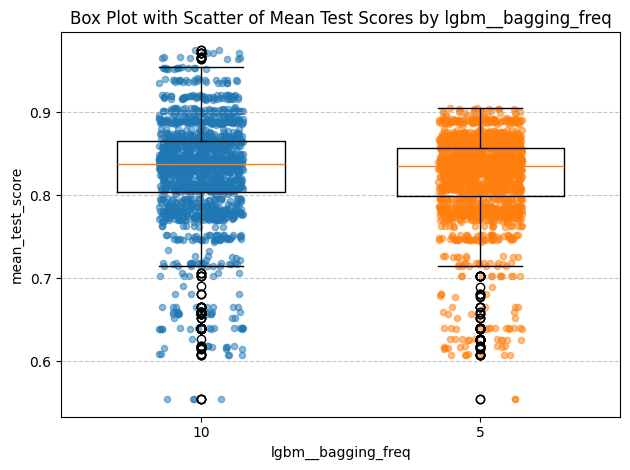

lgbm__bagging_freq: [10  5]


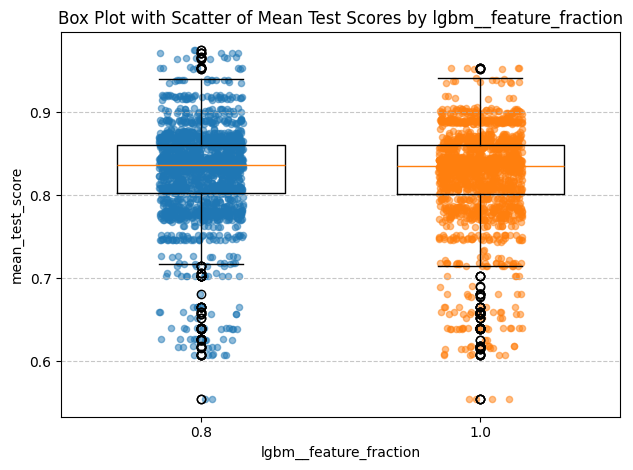

lgbm__feature_fraction: [0.8 1. ]


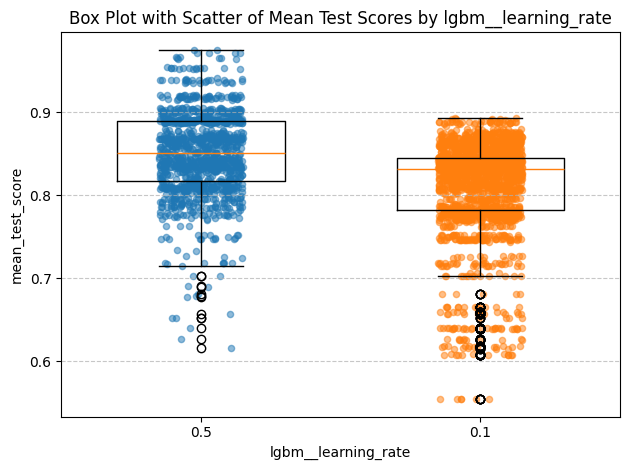

lgbm__learning_rate: [0.5 0.1]


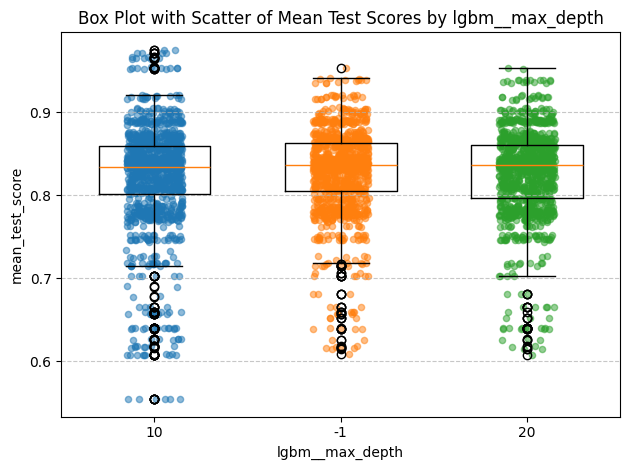

lgbm__max_depth: [10 -1 20]


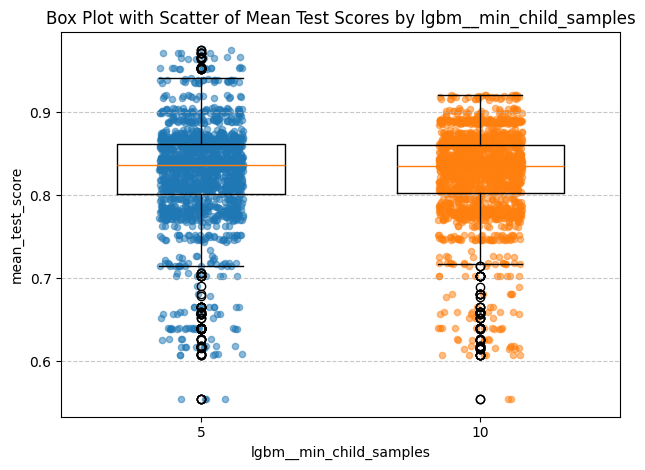

lgbm__min_child_samples: [ 5 10]


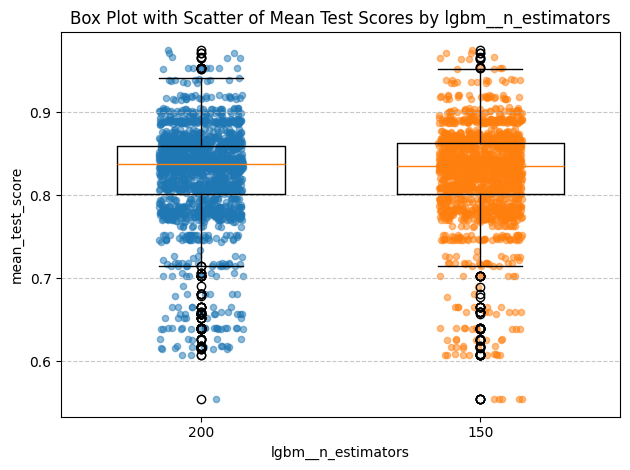

lgbm__n_estimators: [200 150]


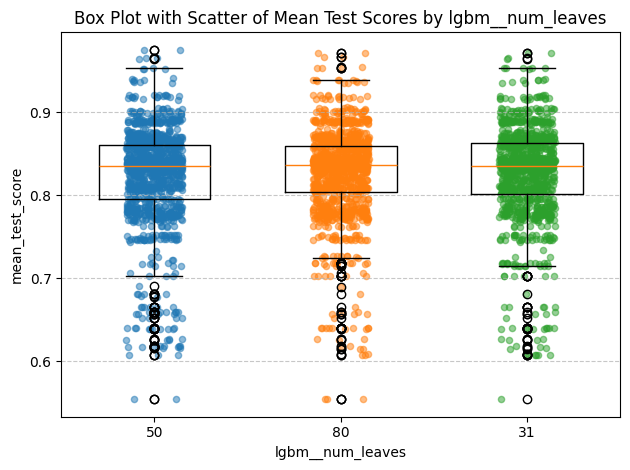

lgbm__num_leaves: [50 80 31]


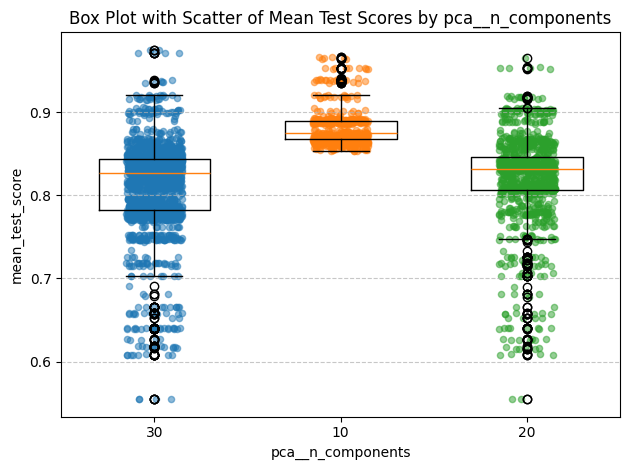

pca__n_components: [30 10 20]


In [ ]:
"""score_col = total_score_df.columns[3:].tolist()
for col in score_col:
    unique_value = total_score_df[col].unique()
    x_size = len(unique_value)
    data = [total_score_df['mean_test_score'][total_score_df[col] == x] for x in unique_value]
    plt.boxplot(data, positions=range(len(unique_value)), labels=unique_value, widths=0.6)
    for i, scores in enumerate(data):
        x_positions = np.full(len(scores), i) + np.random.uniform(-0.15, 0.15, len(scores))
        plt.scatter(x_positions, scores, alpha=0.5, s=20)
    plt.xlabel(col)
    plt.ylabel('mean_test_score')
    plt.title(f'Box Plot with Scatter of Mean Test Scores by {col}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print(f'{col}: {unique_value}')"""

### Isolation Forest

Isolation Forest is an ensemble depth-based outlier detection algorithm that uses a tree structure to build binary trees, called isolation trees, to identify anomalous data. For each isolation tree, a random sub-sample of the entire training dataset is assigned. By selecting a random feature and a random threshold, each data point is split into different branches of the tree until all points are completely isolated. Across multiple isolation trees, outliers are assumed to be located at shallower layers in the trees compared to normal points.

Compared with traditional algorithms like k-means, Isolation Forest is robust in high-dimensional datasets and less affected by the “curse of dimensionality.”

For hyperparameter tuning of the Isolation Forest, we focused on the following hyperparameters:

- 'if__n_estimators': Number of trees.
- 'if__max_samples': A proportion of the dataset (max_samples * X.shape[0]) used to train each tree (for float values).
- 'if__max_features': Maximum number of features (max(1, int(max_features * n_features_in_))) used for tree splits (for float values).
- 'if__bootstrap': If True, individual trees are fit on random subsets of the training data sampled with replacement. If False, sampling is performed without replacement.
- 'if__contamination': The proportion of outliers in the dataset. Our original dataset contains 8% of fraudulent transactions, but we also experimented with other values of contamination to better capture possible outliers, allowing some tolerance for false negatives.

In [ ]:
X_train, X_test, y_train, y_test = X_y_train_test(df_onehot)

In [ ]:
param_if = {
    'pca__n_components': [5, 10, 15, 20, 25],
    'if__n_estimators': [100, 200, 300],
    'if__max_samples': [0.5, 0.75, 1.0],
    'if__max_features': [0.5, 0.75, 1.0],
    'if__bootstrap': [True, False],
    'if__contamination': [ 0.08, 0.1, 0.15, 0.2],
    'if__n_jobs' : [-1],
    'if__random_state': [42]
}
pipeline = Pipeline([
    ('pca', PCA()),
    ('if', IsolationForest())
])

In [ ]:
para,score = random_search_hyperparameter_tuning(pipeline, param_if, X_train, y_train, custom_scoring, n_iter=20)
print("Best Hyperparameters:", para)
print("Best Recall/TPR Score:", score)
pipeline.set_params(**para)
pipeline.fit(X_train)
joblib.dump(pipeline, 'IF.pkl')
y_pred = pipeline.predict(X_test)
y_pred_probs = pipeline.decision_function(X_test)
y_pred_proba = (y_pred_probs- np.min(y_pred_probs))/(np.max(y_pred_probs)-np.min(y_pred_probs))
y_pred_proba = 1 - y_pred_proba
new_y_pred = [0 if x == 1 else 1 for x in y_pred]

Best Hyperparameters: {'pca__n_components': 5, 'if__n_estimators': 100, 'if__max_samples': 0.5, 'if__max_features': 0.75, 'if__bootstrap': False, 'if__contamination': 0.08, 'if__n_jobs': -1, 'if__random_state': 42}
Best Recall/TPR Score: 0.16143201294047257


Specificity: 0.95
Sensitivity: 0.3116258741258741
Accuracy: 0.9004752784280343
Precision: 0.36676954732510286
F1-score: 0.33695652173913043
MCC: 0.2846405952766679

AUC-ROC: 0.6320539623080541
AUC-PR: 0.36712918550735696


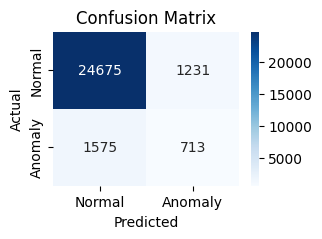

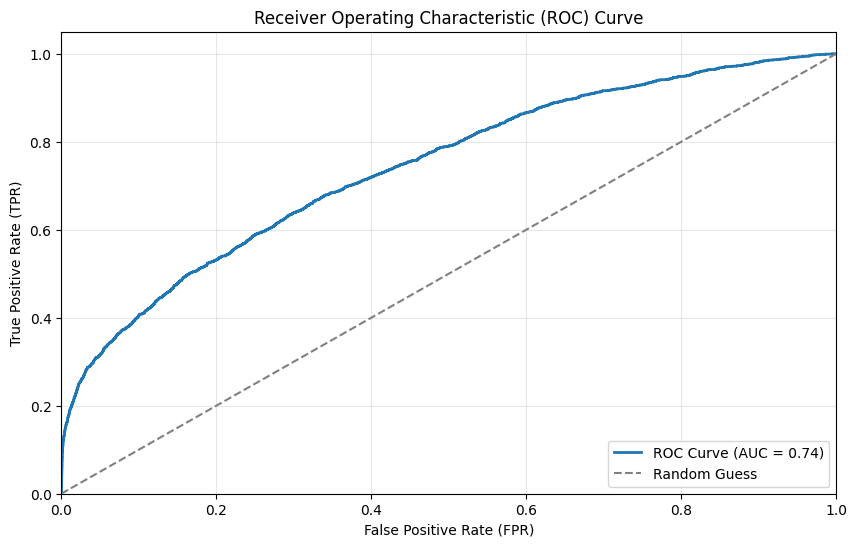

<Figure size 640x480 with 0 Axes>

In [ ]:
specificity, recall, accuracy, precision, f1, mcc, roc_auc, pr_auc = show_performance(y_test, new_y_pred)
model_performance['IF_cluster'] = [specificity, recall, accuracy, precision, f1, mcc, roc_auc, pr_auc]
visual_performance(y_test, new_y_pred, y_pred_proba)

### DBSCAN

DBSCAN is a classic density-based outlier detection algorithm that requires two hyperparameters to turn: epsilon (ε) and minPoints.
- 'dbscan__eps': Epsilon is the radius of the circle created for each data point to check the density
- 'dbscan__min_samples': The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

If the number of the datapoint’s neighbors is less than minPoints, then it will be detected as an outlier. Unlike k-means, DBSCAN can identify clusters of irregular shapes and it effectively separates outliers from clusters. However, DBSCAN may not be suitable for all scenarios since it assumes that all clusters have similar density. Additionally, the hyperparameter tuning for DBSCAN is challenging in the high-dimensional dataset. Therefore, we will test DBSCAN to evaluate its performance on our dataset.

In [ ]:
param_dbscan = {
    'dbscan__eps': [0.1, 0.5, 1.0, 1.5, 2.0],
    'dbscan__min_samples': [5, 10, 15, 20, 25],
    'pca__n_components': [5,10,15,20,25] # Added n_components for PCA
}

pipeline = Pipeline([
    ('pca', PCA()),
    ('dbscan', DBSCAN())
])
para,score = random_search_hyperparameter_tuning(pipeline, param_dbscan, X_train, y_train, custom_scoring, n_iter=20)

In [ ]:
print("Best Hyperparameters:", para)
print("Best Score:", score)
pipeline.set_params(**para)
pipeline.fit(X_train)
joblib.dump(pipeline, 'DBSCAN.pkl')

Best Hyperparameters: {'dbscan__eps': 2.0, 'dbscan__min_samples': 5, 'pca__n_components': 5}
Best Score: 0.16361028564055263


['DBSCAN.pkl']

Specificity: 0.30
Sensitivity: 0.8142482517482518
Accuracy: 0.34308718166985885
Precision: 0.0933413497670224
F1-score: 0.16748325616937115
MCC: 0.0694937878540259

AUC-ROC: 0.5578614068129044
AUC-PR: 0.4613318653813159


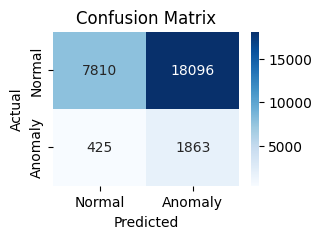

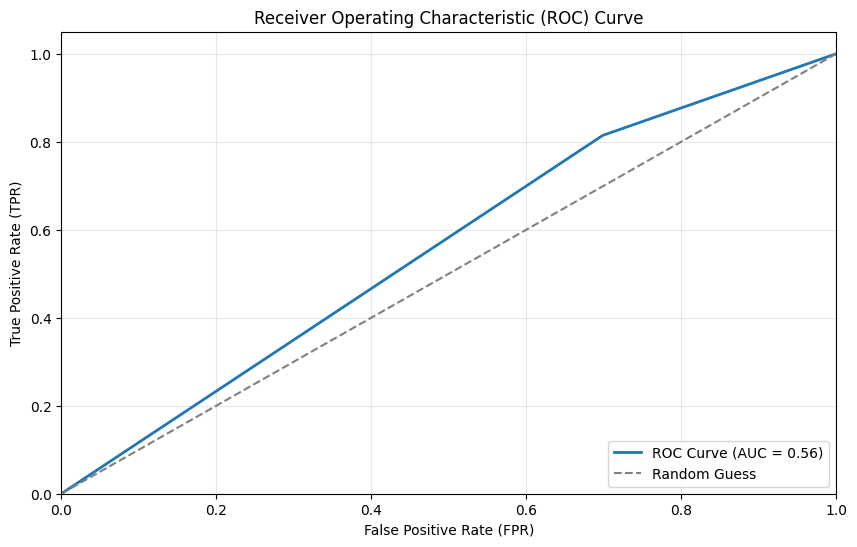

<Figure size 640x480 with 0 Axes>

In [ ]:
y_pred = pipeline.fit_predict(X_test)
new_y_pred = [1 if x == -1 else 0 for x in y_pred]
specificity, recall, accuracy, precision, f1, mcc, roc_auc, pr_auc = show_performance(y_test, new_y_pred)
model_performance['DBSCAN_cluster'] = [specificity, recall, accuracy, precision, f1, mcc, roc_auc, pr_auc]
para_model['DBSCAN_cluster'] = pipeline
visual_performance(y_test, new_y_pred, None)

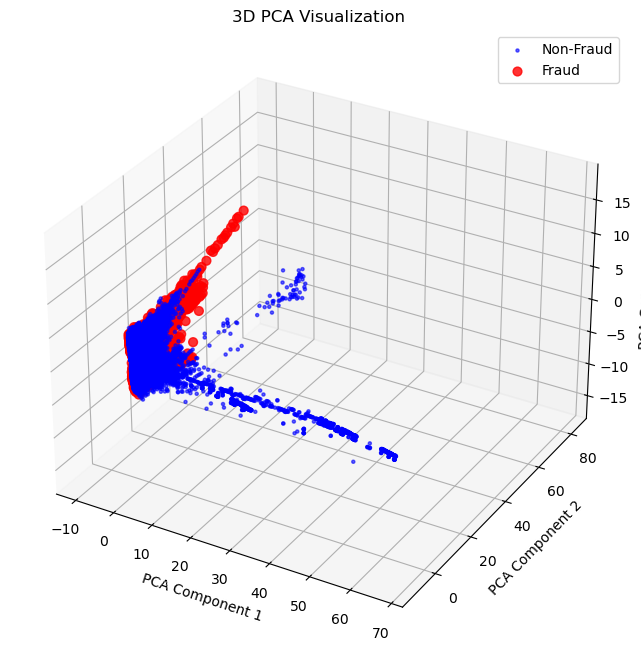

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
X_train, X_test, y_train, y_test = X_y_train_test(df_onehot)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

pca_df = pd.DataFrame(X_pca, columns=['PCA_1', 'PCA_2', 'PCA_3'])
pca_df['Label'] = y_train

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

fraud = pca_df[pca_df['Label'] == 1]
non_fraud = pca_df[pca_df['Label'] == 0]

ax.scatter(non_fraud['PCA_1'], non_fraud['PCA_2'], non_fraud['PCA_3'],
           c='blue', label='Non-Fraud', alpha=0.6, s=5)

ax.scatter(fraud['PCA_1'], fraud['PCA_2'], fraud['PCA_3'],
           c='red', label='Fraud', alpha=0.8, s=40)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA Visualization')
ax.legend()

plt.show()

In [ ]:
model_performance_df = pd.DataFrame.from_dict(model_performance, orient='index', columns=['Specificity', 'Recall', 'Accuracy', 'Precision', 'F1-Score', 'MCC', 'ROC AUC', 'PR AUC'])
model_performance_df.to_csv('model_performance.csv')

# Result Visualization

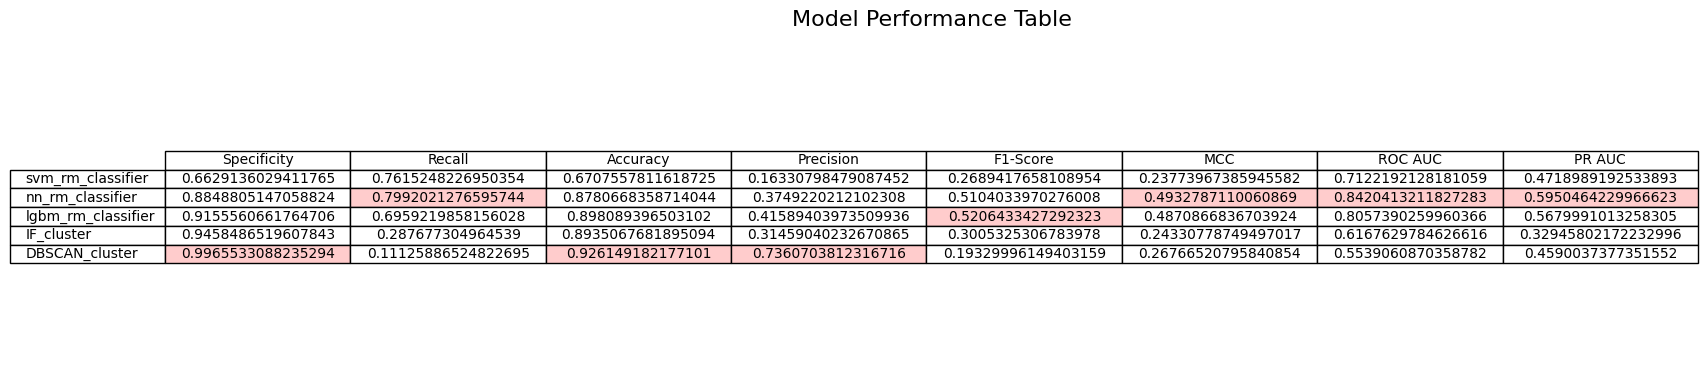

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_axis_off()
table = ax.table(
    cellText=model_performance_df.values,
    rowLabels=model_performance_df.index,
    colLabels=model_performance_df.columns,
    cellLoc='center',
    loc='center',
)
for col_idx, col in enumerate(model_performance_df.columns):
    max_val_idx = model_performance_df[col].idxmax()
    row_idx = list(model_performance_df.index).index(max_val_idx) + 1
    table[row_idx, col_idx].set_facecolor("#ffcccc")
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(model_performance_df.columns))))
plt.title("Model Performance Table", fontsize=16)
plt.tight_layout()
plt.show()

Evaluation Metrics Exploration

- Accuracy (Most basic evaluation metric):Accuracy measures the overall performance of a model. However, it is unsuitable for our case due to the extremely imbalanced nature of our dataset. For instance, even if the model predicts all transactions as non-fraudulent, the accuracy will still be 92%, which might appear acceptable but is highly misleading. In reality, such a model fails to capture any fraudulent transactions. Moreover, since fraudulent transactions are highly risky, we care more about True Positives (TP) than True Negatives (TN), as identifying all fraud is critical, even with some tolerance for False Negatives (FN).

- Recall (Sensitivity):Recall measures the ability to identify the positive class while minimizing False Negatives (FN). This metric seems suitable for our case because the positive class (fraud) is rare and critical to detect. However, optimizing for Recall alone can lead to extreme results, such as models predicting as many positives as possible, including many false positives. For example, when using DBSCAN, optimizing purely for Recall led the model to classify 95% of transactions as fraudulent, which is impractical and not reflective of reality.

- Matthews Correlation Coefficient (MCC):MCC is effective for imbalanced datasets as it considers True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). However, it does not emphasize one class over the other, which is a drawback in our case where True Positives (TP) are more critical. While we use MCC as a reference to compare overall model performance, it is not our primary scoring metric.

- Average Precision (PR-AUC):Average Precision evaluates the trade-off between Precision and Recall for the positive class. It focuses on the positive class (fraud) while also balancing unnecessary positive predictions (false positives). This makes it a well-suited metric for our model, as it reflects both the importance of detecting fraud and the need to reduce false alarms. After switching to Average Precision as the evaluation metric, our model showed better overall performance.

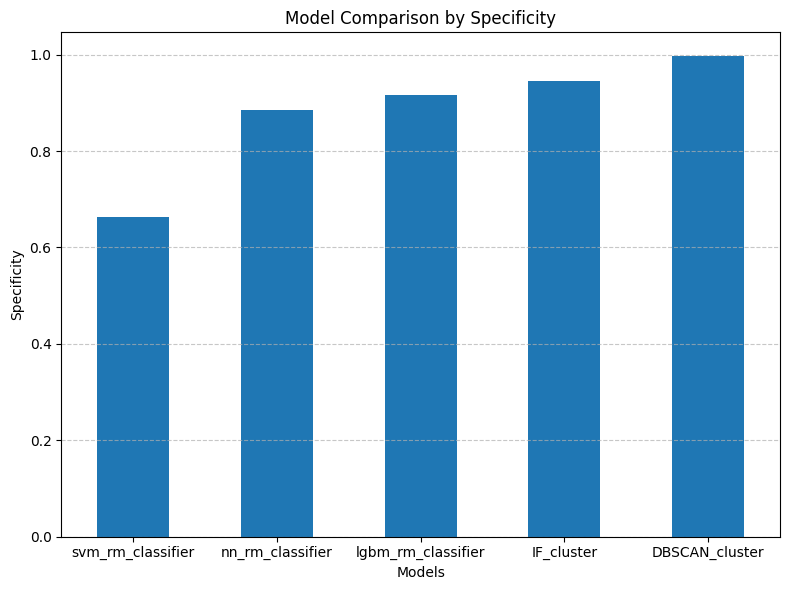

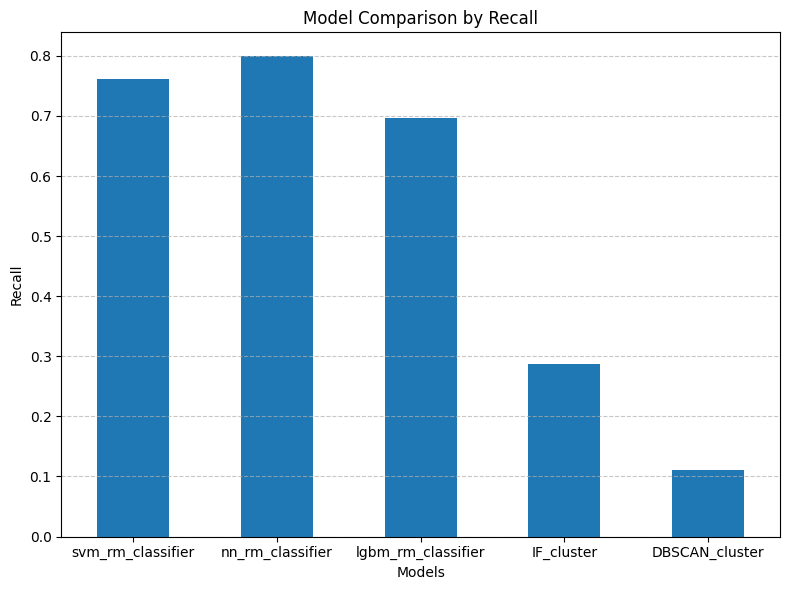

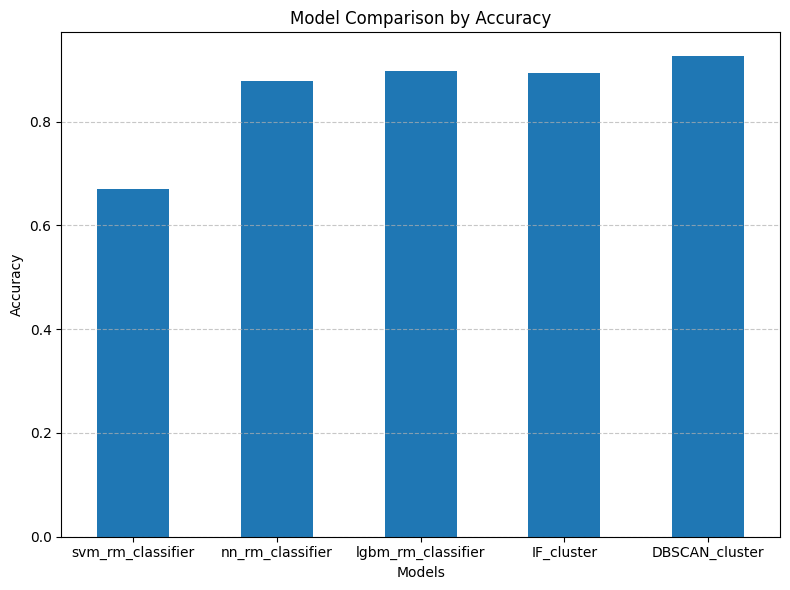

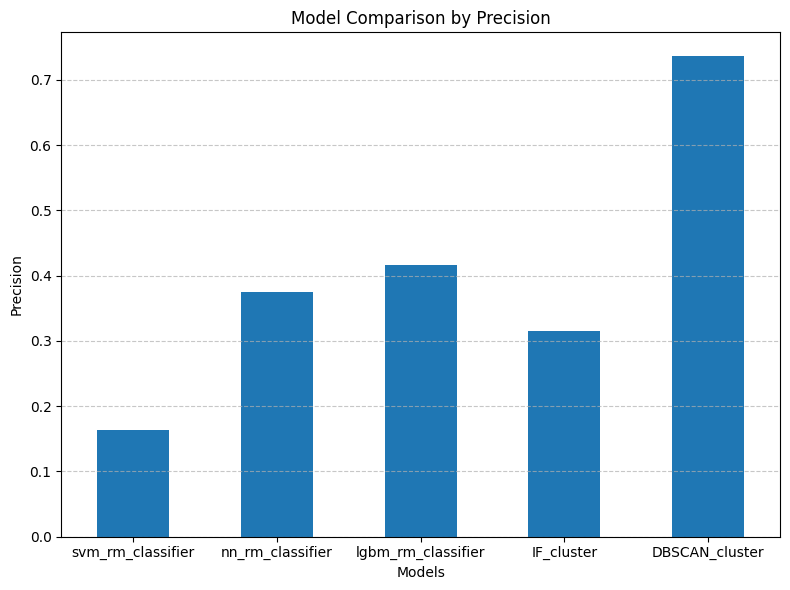

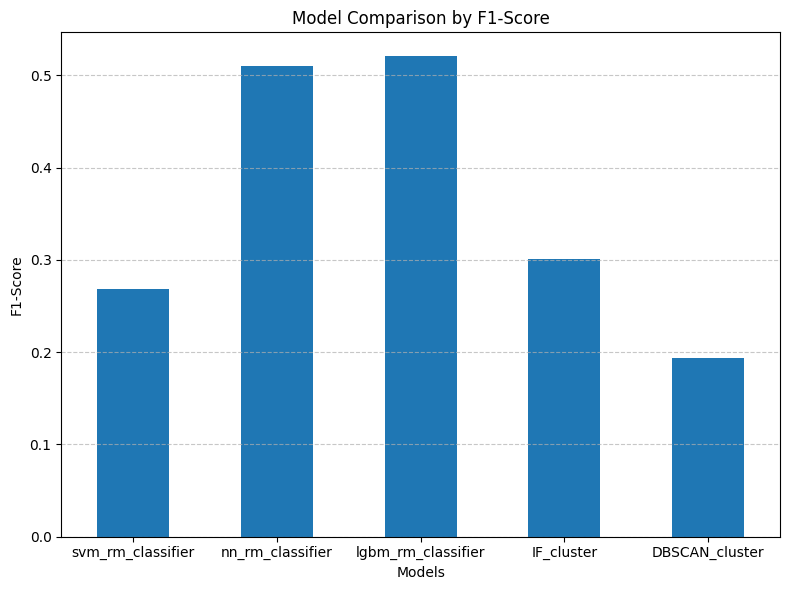

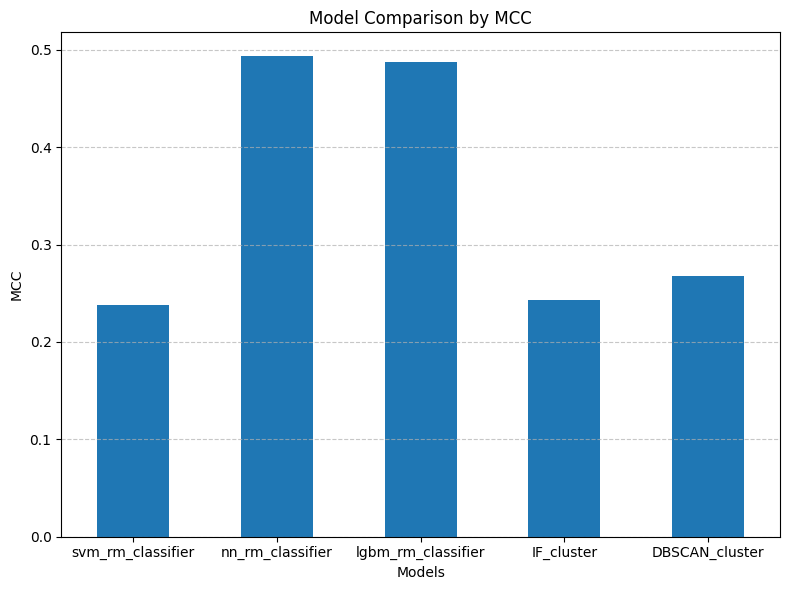

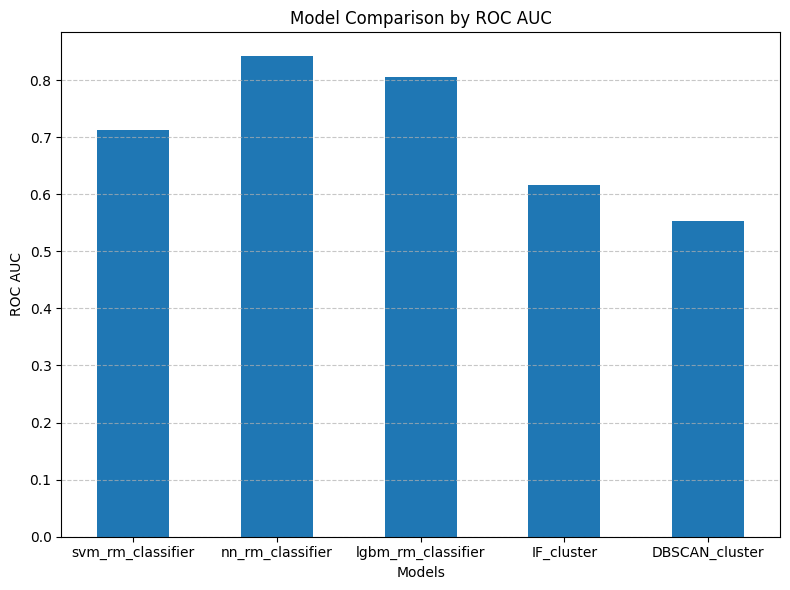

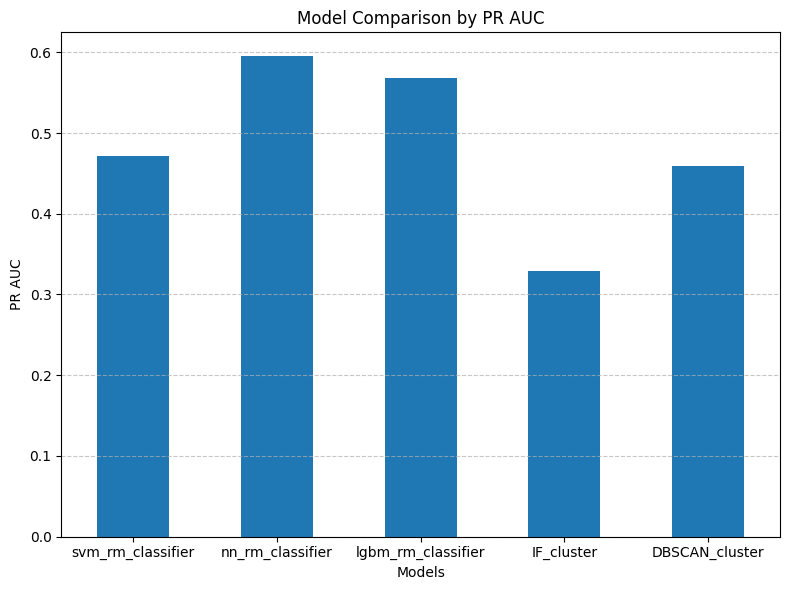

In [ ]:
metrics = model_performance_df.columns
for metric in metrics:
    plt.figure(figsize=(8, 6))
    model_performance_df[metric].plot(kind='bar', rot=0)
    plt.title(f'Model Comparison by {metric}')
    plt.ylabel(metric)
    plt.xlabel('Models')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

<Figure size 1200x800 with 0 Axes>

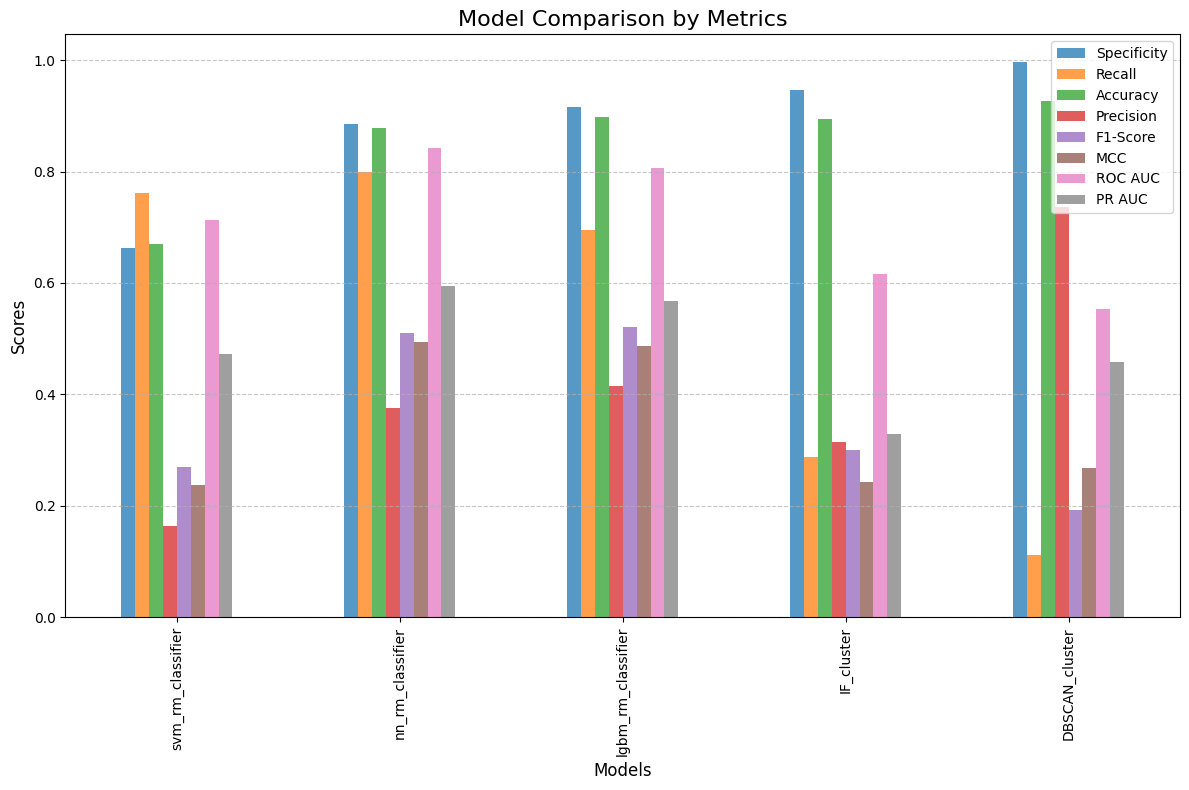

In [ ]:
plt.figure(figsize=(12, 8))
model_performance_df.plot(kind='bar', figsize=(12, 8), alpha=0.75)
plt.title('Model Comparison by Metrics', fontsize=16)
plt.ylabel('Scores', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Conclusion
In conclusion, among all the models, LightGBM and Neural Network delivered the best results. While LightGBM achieved higher accuracy and precision, the Neural Network excelled on more comprehensive evaluation metrics, such as F1-score, MCC, and the area under the ROC and PR curves. After applying oversampling and scaling techniques on the fraud transaction dataset, our supervised models demonstrated better average performance than unsupervised models. This suggests that fraud transactions are not as easily separable from normal transactions in the feature space of our original dataset, which contrasts with our previous research findings. With nearly 80% of fraud transactions successfully captured by our model, we believe our results provide valuable insights for financial institutions to enhance fraud detection in practice.

# Future Plan
Based on the current project results, we plan to improve the model through the following approaches:

1. **Hyperparameter Tuning for Neural Networks**: Although our Neural Network model achieved the best overall performance, we did not have sufficient time to perform Grid Search to optimize its hyperparameters. As deep learning is computationally intensive, more time and resources are needed to fine-tune the model for better results.

2. **Hybrid Evaluation Metrics**: Among all the evaluation metrics, we selected average precision as our final metric to balance precision and recall, with a specific focus on predicting true positives (TP). However, we are also interested in exploring more complex metrics, such as F1-score and MCC. While we attempted to develop a self-designed hybrid evaluation metric, we faced challenges in balancing the metrics with reasonable proportions. This requires further research to design a more robust and interpretable hybrid metric.

# Source Code:
- https://github.com/Yangl1492/Fraud-Detection

\begin{thebibliography}{9}

\bibitem{statista2023}
\label{statista2023}
Statista. (2023). Global card fraud losses in 2023. \textit{Statista}. Retrieved from \url{https://www.statista.com/statistics/1394119/global-card-fraud-losses/}

\bibitem{ftc2023}
\label{ftc2023}
Federal Trade Commission. (2023). \textit{Consumer Sentinel Network Data Book 2023}. Federal Trade Commission. Retrieved from \url{https://www.ftc.gov/system/files/ftc_gov/pdf/CSN-Annual-Data-Book-2023.pdf}

\bibitem{jeribi2024}
\label{jeribi2024}
Fathe Jeribi, “A Comprehensive Machine Learning Framework for Anomaly Detection in Credit Card Transactions.” \textit{International Journal of Advanced Computer Science and Applications(ijacsa)}, 15(6), 2024. http://dx.doi.org/10.14569/IJACSA.2024.0150688

\bibitem{habeeb2022}
\label{habeeb2022}
Ariyaluran Habeeb, Riyaz Ahamed, et al. (2022). “Clustering‐based Real‐time Anomaly Detection—A Breakthrough in Big Data Technologies”. \textit{Transactions on Emerging Telecommunications Technologies}, 33(8), p. n/a-n/a. https://doi.org/10.1002/ett.3647

\end{thebibliography}